## Project Milestone 5: Merging the Data and Storing in a Database/Visualizing Data

##### Please note: Please see my Milestone 5 at the very end of this file. This is a compiled Jupyter Notebook that includes each of my Milestones, with each one building upon the previous.

Pulling it all together!

Now that you have cleaned and transformed your 3 datasets, you need to load them into a database. You can choose what kind of database (SQLLite or MySQL, Postgre SQL are all free options). You will want to load each dataset into SQL Lite as an individual table and then you must join the datasets together in Python into 1 dataset.

Once all the data is merged together in your database, create 5 visualizations that demonstrate the data you have cleansed. You should have at least 2 visualizations that have data from more than one source (meaning, if you have 3 tables, you must have visualizations that span across 2 of the tables – you are also welcome to use your consolidated dataset that you created in the previous step, if you do that, you have met this requirement).
For the visualization portion of the project, you are welcome to use a python library like Matplotlib, Seaborn, or an R package ggPlot2, Plotly, or Tableau/PowerBI.

PowerBI is a free tool that could be used – Tableau only has a free web author. If your use Tableau/PowerBI you need to submit a PDF with your assignment vs the Tableau/PowerBI file.

Clearly label each visualization. Submit your code for merging and storing in the database, with your code for the visualizations along with a 250-500-word summary of what you learned and had to do to complete the project. In your write-up, make sure to address the ethical implications of cleansing data and your project topic. You can submit a Jupyter Notebook or a PDF of your code. If you submit a .py file you need to also include a PDF or attachment of your results.

#### Milestone 1: 

Milestone 1 consisted of my overall project plan, in the form of a PDF.

#### Milestone 2: Cleaning/Formatting Flat File Source

In [1]:
## Import libraries. 

import pandas as pd
import os
import numpy as np

#### Flat File Source 1: Parks Dataset

This specific dataset does not require many transformations (it is in pretty clean condition already for my purposes), however, my second flat-file dataset will require more. I will transform file source two after file source one. 

In [2]:
## Load dataset (flat file source #1).

natparks_df = pd.read_csv(r"C:\Users\Madeleine's PC\Documents\Madeleine\Documents\Bellevue University Courses\Masters in DS\BU DSC540\Term Project\Data\parks.csv")

In [3]:
## View the dataset.

natparks_df.head()

Park Code               Park Name State   Acres  Latitude  Longitude
0      ACAD    Acadia National Park    ME   47390     44.35     -68.21
1      ARCH    Arches National Park    UT   76519     38.68    -109.57
2      BADL  Badlands National Park    SD  242756     43.75    -102.50
3      BIBE  Big Bend National Park    TX  801163     29.25    -103.25
4      BISC  Biscayne National Park    FL  172924     25.65     -80.08

In [4]:
## Transformation 1: Replace headers.

natparks_df.rename(columns={"Park Code": "park_id", "Park Name": "park_name", "State": "state", "Acres": "acres", "Latitude": "latitude", "Longitude": "longitude"}, inplace=True)

## View columns to ensure formatting.
natparks_df.columns

Index(['park_id', 'park_name', 'state', 'acres', 'latitude', 'longitude'], dtype='object')

Transformation 1: This transformation is replacing the dataset headers to be formatted in such a way that they are easy to read and so that they align with my second dataset. I have found that the "word_word" format works best for my purposes.

In [5]:
## View dataset.

natparks_df.head()

park_id               park_name state   acres  latitude  longitude
0    ACAD    Acadia National Park    ME   47390     44.35     -68.21
1    ARCH    Arches National Park    UT   76519     38.68    -109.57
2    BADL  Badlands National Park    SD  242756     43.75    -102.50
3    BIBE  Big Bend National Park    TX  801163     29.25    -103.25
4    BISC  Biscayne National Park    FL  172924     25.65     -80.08

In [6]:
## Transformation 2: Identify and ensure that NaN values are read as such (handling missing data). 

## Locate missing values.
natparks_df.isnull().head()
natparks_df.isnull().sum()

park_id      0
park_name    0
state        0
acres        0
latitude     0
longitude    0
dtype: int64

Transformation 2: This specific dataset on its own does not have a ton of variables, and it is already formatted in such a way that it does not need a ton of robust transformations (at least, not at this point in time and for my needs). Additionally, I can see no null values exist, so I don't need to worry about handling any missing values on this one. 

#### Flat File Source 2: Species Dataset

In [7]:
## Load dataset (flat file source #2).

npspecies_df = pd.read_csv(r"C:\Users\Madeleine's PC\Documents\Madeleine\Documents\Bellevue University Courses\Masters in DS\BU DSC540\Term Project\Data\species.csv")

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
## View the dataset.

npspecies_df.head()

Species ID             Park Name Category         Order    Family  \
0  ACAD-1000  Acadia National Park   Mammal  Artiodactyla  Cervidae   
1  ACAD-1001  Acadia National Park   Mammal  Artiodactyla  Cervidae   
2  ACAD-1002  Acadia National Park   Mammal     Carnivora   Canidae   
3  ACAD-1003  Acadia National Park   Mammal     Carnivora   Canidae   
4  ACAD-1004  Acadia National Park   Mammal     Carnivora   Canidae   

          Scientific Name                                       Common Names  \
0             Alces alces                                              Moose   
1  Odocoileus virginianus  Northern White-Tailed Deer, Virginia Deer, Whi...   
2           Canis latrans                             Coyote, Eastern Coyote   
3             Canis lupus        Eastern Timber Wolf, Gray Wolf, Timber Wolf   
4           Vulpes vulpes  Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...   

  Record Status     Occurrence  Nativeness Abundance Seasonality  \
0      Approved        Present      Native      Rare    Resident   
1      Approved        Present      Native  Abundant         NaN   
2      Approved        Present  Not Native    Common         NaN   
3      Approved  Not Confirmed      Native       NaN         NaN   
4      Approved        Present     Unknown    Common     Breeder   

  Conservation Status Unnamed: 13  
0                 NaN         NaN  
1                 NaN         NaN  
2  Species of Concern         NaN  
3          Endangered         NaN  
4                 NaN         NaN

In [9]:
## Transformation 1: Replace headers.

npspecies_df.rename(columns={"Species ID": "np_species_id", "Park Name": "park_name", "Category": "category", "Order": "order", 
                             "Family": "family", "Scientific Name": "scientific_name", "Common Names": "common_names",
                            "Record Status": "record_status", "Occurrence": "occurence", "Nativeness": "nativeness",
                            "Abundance": "abundance", "Seasonality": "seasonality", "Conservation Status": "conservation_status",
                            "Unnamed: 13": "unnamed_13"}, inplace=True)

## View columns to ensure formatting.
npspecies_df.columns

Index(['np_species_id', 'park_name', 'category', 'order', 'family',
       'scientific_name', 'common_names', 'record_status', 'occurence',
       'nativeness', 'abundance', 'seasonality', 'conservation_status',
       'unnamed_13'],
      dtype='object')

Transformation 1: This transformation is replacing the dataset headers to be formatted in such a way that they are easy to read and so that they align with my second dataset. I have found that the "word_word" format works best for my purposes.

In [10]:
## Transformation 2: Parse out the National Park ID from the Species ID (first 4 alphabet digits).

npspecies_df[['park_id', 'species_id']] = npspecies_df.np_species_id.str.split("-",expand=True,)
npspecies_df.head(10)

np_species_id             park_name category         order      family  \
0     ACAD-1000  Acadia National Park   Mammal  Artiodactyla    Cervidae   
1     ACAD-1001  Acadia National Park   Mammal  Artiodactyla    Cervidae   
2     ACAD-1002  Acadia National Park   Mammal     Carnivora     Canidae   
3     ACAD-1003  Acadia National Park   Mammal     Carnivora     Canidae   
4     ACAD-1004  Acadia National Park   Mammal     Carnivora     Canidae   
5     ACAD-1005  Acadia National Park   Mammal     Carnivora     Felidae   
6     ACAD-1006  Acadia National Park   Mammal     Carnivora     Felidae   
7     ACAD-1007  Acadia National Park   Mammal     Carnivora  Mephitidae   
8     ACAD-1008  Acadia National Park   Mammal     Carnivora  Mustelidae   
9     ACAD-1009  Acadia National Park   Mammal     Carnivora  Mustelidae   

          scientific_name                                       common_names  \
0             Alces alces                                              Moose   
1  Odocoileus virginianus  Northern White-Tailed Deer, Virginia Deer, Whi...   
2           Canis latrans                             Coyote, Eastern Coyote   
3             Canis lupus        Eastern Timber Wolf, Gray Wolf, Timber Wolf   
4           Vulpes vulpes  Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...   
5         Lynx canadensis                                        Canada Lynx   
6              Lynx rufus               Bay Lynx, Bobcat, Red Lynx, Wild Cat   
7       Mephitis mephitis              Eastern Skunk, Polecat, Striped Skunk   
8        Lutra canadensis                                 Otter, River Otter   
9         Martes pennanti                            Blackcat, Fisher, Pekan   

  record_status                        occurence  nativeness abundance  \
0      Approved                          Present      Native      Rare   
1      Approved                          Present      Native  Abundant   
2      Approved                          Present  Not Native    Common   
3      Approved                    Not Confirmed      Native       NaN   
4      Approved                          Present     Unknown    Common   
5      Approved                    Not Confirmed      Native       NaN   
6      Approved  Not Present (Historical Report)  Not Native       NaN   
7      Approved  Not Present (Historical Report)      Native       NaN   
8      Approved                          Present      Native    Common   
9      Approved                          Present      Native      Rare   

  seasonality conservation_status unnamed_13 park_id species_id  
0    Resident                 NaN        NaN    ACAD       1000  
1         NaN                 NaN        NaN    ACAD       1001  
2         NaN  Species of Concern        NaN    ACAD       1002  
3         NaN          Endangered        NaN    ACAD       1003  
4     Breeder                 NaN        NaN    ACAD       1004  
5         NaN                 NaN        NaN    ACAD       1005  
6     Vagrant                 NaN        NaN    ACAD       1006  
7         NaN                 NaN        NaN    ACAD       1007  
8     Breeder                 NaN        NaN    ACAD       1008  
9         NaN                 NaN        NaN    ACAD       1009

Transformation 2: This transformation is parsing out the np_species_id into the national park ID value and the species value. This is so I can align this dataset with my first one, at the intersection of park_id.

In [11]:
## Tranformation 3: Remove the data columns that I will not need to utilize or that do not have meaning to me/my project.
## At this point, this will be the unnamed_13 column. I may remove more later as I see fit/necessary.

npspecies_df.drop(['unnamed_13'], axis='columns', inplace = True)
npspecies_df

np_species_id             park_name        category          order  \
0          ACAD-1000  Acadia National Park          Mammal   Artiodactyla   
1          ACAD-1001  Acadia National Park          Mammal   Artiodactyla   
2          ACAD-1002  Acadia National Park          Mammal      Carnivora   
3          ACAD-1003  Acadia National Park          Mammal      Carnivora   
4          ACAD-1004  Acadia National Park          Mammal      Carnivora   
...              ...                   ...             ...            ...   
119243     ZION-2791    Zion National Park  Vascular Plant      Solanales   
119244     ZION-2792    Zion National Park  Vascular Plant        Vitales   
119245     ZION-2793    Zion National Park  Vascular Plant        Vitales   
119246     ZION-2794    Zion National Park  Vascular Plant  Zygophyllales   
119247     ZION-2795    Zion National Park  Vascular Plant  Zygophyllales   

                family         scientific_name  \
0             Cervidae             Alces alces   
1             Cervidae  Odocoileus virginianus   
2              Canidae           Canis latrans   
3              Canidae             Canis lupus   
4              Canidae           Vulpes vulpes   
...                ...                     ...   
119243      Solanaceae       Solanum triflorum   
119244        Vitaceae         Vitis arizonica   
119245        Vitaceae          Vitis vinifera   
119246  Zygophyllaceae       Larrea tridentata   
119247  Zygophyllaceae     Tribulus terrestris   

                                             common_names record_status  \
0                                                   Moose      Approved   
1       Northern White-Tailed Deer, Virginia Deer, Whi...      Approved   
2                                  Coyote, Eastern Coyote      Approved   
3             Eastern Timber Wolf, Gray Wolf, Timber Wolf      Approved   
4       Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...      Approved   
...                                                   ...           ...   
119243                                Cut-Leaf Nightshade      Approved   
119244                                       Canyon Grape      Approved   
119245                                         Wine Grape      Approved   
119246                                      Creosote Bush      Approved   
119247                                      Puncture Vine      Approved   

            occurence  nativeness abundance seasonality conservation_status  \
0             Present      Native      Rare    Resident                 NaN   
1             Present      Native  Abundant         NaN                 NaN   
2             Present  Not Native    Common         NaN  Species of Concern   
3       Not Confirmed      Native       NaN         NaN          Endangered   
4             Present     Unknown    Common     Breeder                 NaN   
...               ...         ...       ...         ...                 ...   
119243        Present      Native  Uncommon         NaN                 NaN   
119244        Present      Native  Uncommon         NaN                 NaN   
119245        Present  Not Native  Uncommon         NaN                 NaN   
119246        Present      Native      Rare         NaN                 NaN   
119247        Present  Not Native  Uncommon         NaN                 NaN   

       park_id species_id  
0         ACAD       1000  
1         ACAD       1001  
2         ACAD       1002  
3         ACAD       1003  
4         ACAD       1004  
...        ...        ...  
119243    ZION       2791  
119244    ZION       2792  
119245    ZION       2793  
119246    ZION       2794  
119247    ZION       2795  

[119248 rows x 15 columns]

Transformation 3: This transformation is removing the unnamed_13 column, as it is of no value to me for this project. Doing this removal is important because it declutters the dataset.

In [12]:
## Transformation 4: Ensure that NaN values are read as such (handling missing data). 
## Then, refill the values with/as an unknown class.

## Locate missing values.
npspecies_df.isnull().head()

np_species_id  park_name  category  order  family  scientific_name  \
0          False      False     False  False   False            False   
1          False      False     False  False   False            False   
2          False      False     False  False   False            False   
3          False      False     False  False   False            False   
4          False      False     False  False   False            False   

   common_names  record_status  occurence  nativeness  abundance  seasonality  \
0         False          False      False       False      False        False   
1         False          False      False       False      False         True   
2         False          False      False       False      False         True   
3         False          False      False       False       True         True   
4         False          False      False       False      False        False   

   conservation_status  park_id  species_id  
0                 True    False       False  
1                 True    False       False  
2                False    False       False  
3                False    False       False  
4                 True    False       False

In [13]:
## Transformation 4 Continued: 

## Fill with unknown class (like done so here, Method 2: https://www.geeksforgeeks.org/pandas-filling-nan-in-categorical-data/)
npspecies_df = npspecies_df.fillna("Unknown")
npspecies_df.head()

## Check missing value occurrence and that unknown class has been applied appropriately.
npspecies_df.isnull().sum()

np_species_id          0
park_name              0
category               0
order                  0
family                 0
scientific_name        0
common_names           0
record_status          0
occurence              0
nativeness             0
abundance              0
seasonality            0
conservation_status    0
park_id                0
species_id             0
dtype: int64

Transformation 4: This transformation is locating all null values. After that, I replace those values with "Unknown."

In [14]:
## Transformation 5: Merge the two datasets.

np_merged_df = pd.merge(natparks_df, npspecies_df, on = 'park_id')
np_merged_df

park_id           park_name_x state   acres  latitude  longitude  \
0         ACAD  Acadia National Park    ME   47390     44.35     -68.21   
1         ACAD  Acadia National Park    ME   47390     44.35     -68.21   
2         ACAD  Acadia National Park    ME   47390     44.35     -68.21   
3         ACAD  Acadia National Park    ME   47390     44.35     -68.21   
4         ACAD  Acadia National Park    ME   47390     44.35     -68.21   
...        ...                   ...   ...     ...       ...        ...   
119243    ZION    Zion National Park    UT  146598     37.30    -113.05   
119244    ZION    Zion National Park    UT  146598     37.30    -113.05   
119245    ZION    Zion National Park    UT  146598     37.30    -113.05   
119246    ZION    Zion National Park    UT  146598     37.30    -113.05   
119247    ZION    Zion National Park    UT  146598     37.30    -113.05   

       np_species_id           park_name_y        category          order  \
0          ACAD-1000  Acadia National Park          Mammal   Artiodactyla   
1          ACAD-1001  Acadia National Park          Mammal   Artiodactyla   
2          ACAD-1002  Acadia National Park          Mammal      Carnivora   
3          ACAD-1003  Acadia National Park          Mammal      Carnivora   
4          ACAD-1004  Acadia National Park          Mammal      Carnivora   
...              ...                   ...             ...            ...   
119243     ZION-2791    Zion National Park  Vascular Plant      Solanales   
119244     ZION-2792    Zion National Park  Vascular Plant        Vitales   
119245     ZION-2793    Zion National Park  Vascular Plant        Vitales   
119246     ZION-2794    Zion National Park  Vascular Plant  Zygophyllales   
119247     ZION-2795    Zion National Park  Vascular Plant  Zygophyllales   

                family         scientific_name  \
0             Cervidae             Alces alces   
1             Cervidae  Odocoileus virginianus   
2              Canidae           Canis latrans   
3              Canidae             Canis lupus   
4              Canidae           Vulpes vulpes   
...                ...                     ...   
119243      Solanaceae       Solanum triflorum   
119244        Vitaceae         Vitis arizonica   
119245        Vitaceae          Vitis vinifera   
119246  Zygophyllaceae       Larrea tridentata   
119247  Zygophyllaceae     Tribulus terrestris   

                                             common_names record_status  \
0                                                   Moose      Approved   
1       Northern White-Tailed Deer, Virginia Deer, Whi...      Approved   
2                                  Coyote, Eastern Coyote      Approved   
3             Eastern Timber Wolf, Gray Wolf, Timber Wolf      Approved   
4       Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...      Approved   
...                                                   ...           ...   
119243                                Cut-Leaf Nightshade      Approved   
119244                                       Canyon Grape      Approved   
119245                                         Wine Grape      Approved   
119246                                      Creosote Bush      Approved   
119247                                      Puncture Vine      Approved   

            occurence  nativeness abundance seasonality conservation_status  \
0             Present      Native      Rare    Resident             Unknown   
1             Present      Native  Abundant     Unknown             Unknown   
2             Present  Not Native    Common     Unknown  Species of Concern   
3       Not Confirmed      Native   Unknown     Unknown          Endangered   
4             Present     Unknown    Common     Breeder             Unknown   
...               ...         ...       ...         ...                 ...   
119243        Present      Native  Uncommon     Unknown             Unknown   
119244        Present      Native  Uncommon    

Transformation 5: This is the last and final transformation, and arguably the most important to future use. In this step, I have merged my two datasets on the park_id variable, and this allows me to align my data sources on the National Park that each respective data point belongs to.

Overall, these are my transformations for my flat file sources. As I work through my project, I may find that additional changes might need to be made, but for now, my flat file sources are in a great place for usage.

Note: Prior to Milestone 5, I did complete some additional transformations to use with the rest of my data. Those can be seen below.

In [15]:
## Additional transformations prior to final milestone.

## Change park_id to all lowercase.
np_merged_df['park_id'] = np_merged_df['park_id'].str.lower()

In [16]:
## Strip all of the words after the park name (strip National Park)
np_merged_df['park_name_x'] = np_merged_df['park_name_x'].map(lambda x: x.replace(' National Park', ''))
np_merged_df['park_name_y'] = np_merged_df['park_name_y'].map(lambda x: x.replace(' National Park', ''))

In [17]:
np_merged_df = np_merged_df.rename(columns={"park_name_x": "park_name"})

In [18]:
np_merged_df

park_id park_name state   acres  latitude  longitude np_species_id  \
0         acad    Acadia    ME   47390     44.35     -68.21     ACAD-1000   
1         acad    Acadia    ME   47390     44.35     -68.21     ACAD-1001   
2         acad    Acadia    ME   47390     44.35     -68.21     ACAD-1002   
3         acad    Acadia    ME   47390     44.35     -68.21     ACAD-1003   
4         acad    Acadia    ME   47390     44.35     -68.21     ACAD-1004   
...        ...       ...   ...     ...       ...        ...           ...   
119243    zion      Zion    UT  146598     37.30    -113.05     ZION-2791   
119244    zion      Zion    UT  146598     37.30    -113.05     ZION-2792   
119245    zion      Zion    UT  146598     37.30    -113.05     ZION-2793   
119246    zion      Zion    UT  146598     37.30    -113.05     ZION-2794   
119247    zion      Zion    UT  146598     37.30    -113.05     ZION-2795   

       park_name_y        category          order          family  \
0           Acadia          Mammal   Artiodactyla        Cervidae   
1           Acadia          Mammal   Artiodactyla        Cervidae   
2           Acadia          Mammal      Carnivora         Canidae   
3           Acadia          Mammal      Carnivora         Canidae   
4           Acadia          Mammal      Carnivora         Canidae   
...            ...             ...            ...             ...   
119243        Zion  Vascular Plant      Solanales      Solanaceae   
119244        Zion  Vascular Plant        Vitales        Vitaceae   
119245        Zion  Vascular Plant        Vitales        Vitaceae   
119246        Zion  Vascular Plant  Zygophyllales  Zygophyllaceae   
119247        Zion  Vascular Plant  Zygophyllales  Zygophyllaceae   

               scientific_name  \
0                  Alces alces   
1       Odocoileus virginianus   
2                Canis latrans   
3                  Canis lupus   
4                Vulpes vulpes   
...                        ...   
119243       Solanum triflorum   
119244         Vitis arizonica   
119245          Vitis vinifera   
119246       Larrea tridentata   
119247     Tribulus terrestris   

                                             common_names record_status  \
0                                                   Moose      Approved   
1       Northern White-Tailed Deer, Virginia Deer, Whi...      Approved   
2                                  Coyote, Eastern Coyote      Approved   
3             Eastern Timber Wolf, Gray Wolf, Timber Wolf      Approved   
4       Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...      Approved   
...                                                   ...           ...   
119243                                Cut-Leaf Nightshade      Approved   
119244                                       Canyon Grape      Approved   
119245                                         Wine Grape      Approved   
119246                                      Creosote Bush      Approved   
119247                                      Puncture Vine      Approved   

            occurence  nativeness abundance seasonality conservation_status  \
0             Present      Native      Rare    Resident             Unknown   
1             Present      Native  Abundant     Unknown             Unknown   
2             Present  Not Native    Common     Unknown  Species of Concern   
3       Not Confirmed      Native   Unknown     Unknown          Endangered   
4             Present     Unknown    Common     Breeder             Unknown   
...               ...         ...       ...         ...                 ...   
119243        Present      Native  Uncommon     Unknown             Unknown   
119244        Present      Native  Uncommon     Unknown             Unknown   
119245        Present  Not Native  Uncommon     Unknown             Unknown   
119246        Present      Native      Rare     Unknown             Unknown   
119247        Present  Not Native  Uncommon     Unknown             Unknow

In [19]:
np_merged_df = np_merged_df.rename(columns={"park_name_x": "park_name"})

In [20]:
np_merged_df

park_id park_name state   acres  latitude  longitude np_species_id  \
0         acad    Acadia    ME   47390     44.35     -68.21     ACAD-1000   
1         acad    Acadia    ME   47390     44.35     -68.21     ACAD-1001   
2         acad    Acadia    ME   47390     44.35     -68.21     ACAD-1002   
3         acad    Acadia    ME   47390     44.35     -68.21     ACAD-1003   
4         acad    Acadia    ME   47390     44.35     -68.21     ACAD-1004   
...        ...       ...   ...     ...       ...        ...           ...   
119243    zion      Zion    UT  146598     37.30    -113.05     ZION-2791   
119244    zion      Zion    UT  146598     37.30    -113.05     ZION-2792   
119245    zion      Zion    UT  146598     37.30    -113.05     ZION-2793   
119246    zion      Zion    UT  146598     37.30    -113.05     ZION-2794   
119247    zion      Zion    UT  146598     37.30    -113.05     ZION-2795   

       park_name_y        category          order          family  \
0           Acadia          Mammal   Artiodactyla        Cervidae   
1           Acadia          Mammal   Artiodactyla        Cervidae   
2           Acadia          Mammal      Carnivora         Canidae   
3           Acadia          Mammal      Carnivora         Canidae   
4           Acadia          Mammal      Carnivora         Canidae   
...            ...             ...            ...             ...   
119243        Zion  Vascular Plant      Solanales      Solanaceae   
119244        Zion  Vascular Plant        Vitales        Vitaceae   
119245        Zion  Vascular Plant        Vitales        Vitaceae   
119246        Zion  Vascular Plant  Zygophyllales  Zygophyllaceae   
119247        Zion  Vascular Plant  Zygophyllales  Zygophyllaceae   

               scientific_name  \
0                  Alces alces   
1       Odocoileus virginianus   
2                Canis latrans   
3                  Canis lupus   
4                Vulpes vulpes   
...                        ...   
119243       Solanum triflorum   
119244         Vitis arizonica   
119245          Vitis vinifera   
119246       Larrea tridentata   
119247     Tribulus terrestris   

                                             common_names record_status  \
0                                                   Moose      Approved   
1       Northern White-Tailed Deer, Virginia Deer, Whi...      Approved   
2                                  Coyote, Eastern Coyote      Approved   
3             Eastern Timber Wolf, Gray Wolf, Timber Wolf      Approved   
4       Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...      Approved   
...                                                   ...           ...   
119243                                Cut-Leaf Nightshade      Approved   
119244                                       Canyon Grape      Approved   
119245                                         Wine Grape      Approved   
119246                                      Creosote Bush      Approved   
119247                                      Puncture Vine      Approved   

            occurence  nativeness abundance seasonality conservation_status  \
0             Present      Native      Rare    Resident             Unknown   
1             Present      Native  Abundant     Unknown             Unknown   
2             Present  Not Native    Common     Unknown  Species of Concern   
3       Not Confirmed      Native   Unknown     Unknown          Endangered   
4             Present     Unknown    Common     Breeder             Unknown   
...               ...         ...       ...         ...                 ...   
119243        Present      Native  Uncommon     Unknown             Unknown   
119244        Present      Native  Uncommon     Unknown             Unknown   
119245        Present  Not Native  Uncommon     Unknown             Unknown   
119246        Present      Native      Rare     Unknown             Unknown   
119247        Present  Not Native  Uncommon     Unknown             Unknow

#### Milestone 3: Cleaning/Formatting Website Data

### Website Data

I have two (2) website data sources, and will clean them both to varying degress. Please see my below process for these transformations. 

#### Web Data Source One: National Parks Elevation Wikipedia Data Table

#### Pulling in the data:

In [21]:
## Import libraries. 
import pandas as pd
import os
import numpy as np

In [22]:
## Open the page in a separate Chrome/Firefox tab 
## and use something like an Inspect Element tool to view the source HTML and understand its structure.

## Import urllib and BeautifulSoup and load the data.
import urllib.request
from bs4 import BeautifulSoup

## Import codecs to help process if needed.
import codecs

In [23]:
## Pull in the web page, read the web page, and print the contents for viewing.
url = "https://en.wikipedia.org/wiki/List_of_U.S._National_Parks_by_elevation"
request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
html_doc = response.read().decode('utf-8')
print(html_doc)

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>List of U.S. National Parks by elevation - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"502e84e7-81ad-4890-9682-2f7477782e50","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_U.S._National_Parks_by_elevation","wgTitle":"List of U.S. National Parks by elevation","wgCurRevisionId":1041654338,"wgRevisionId":1041654338,"wgArticleId":15416653,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from W

In [24]:
## Obtain some additional information on the web page.
## Read the page using bs4.
soup = BeautifulSoup(html_doc, 'html.parser')

## Find the table structure you will need to deal with (how many tables are there?).
all_tables = soup.find_all("table")

## Print those tables.
print("Total number of tables are: {}.".format(len(all_tables)))

Total number of tables are: 2.


In [25]:
## Print our web page findings in a "prettier" format.
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of U.S. National Parks by elevation - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"502e84e7-81ad-4890-9682-2f7477782e50","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_U.S._National_Parks_by_elevation","wgTitle":"List of U.S. National Parks by elevation","wgCurRevisionId":1041654338,"wgRevisionId":1041654338,"wgArticleId":15416653,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description i

In [26]:
## Find the right table using bs4.
data_table = soup.find("table",{"class":"wikitable sortable"})

## Print out type.
print(type(data_table))

<class 'bs4.element.Tag'>


In [27]:
## Print data_table.
data_table

<table class="wikitable sortable">
<tbody><tr>
<th>Rank
</th>
<th>Park
</th>
<th>Location
</th>
<th><a class="mw-redirect" href="/wiki/Summit_(topography)" title="Summit (topography)">Peak</a> name
</th>
<th><a href="/wiki/Mountain_range" title="Mountain range">Mountain range</a>
</th>
<th data-sort-type="number"><a class="mw-redirect" href="/wiki/Topographic_elevation" title="Topographic elevation">Elevation</a>
</th>
<th>Location of lowest point
</th>
<th data-sort-type="number"><a href="/wiki/Drainage_basin" title="Drainage basin">Minimum elevation</a>
</th>
<th data-sort-type="number"><a href="/wiki/Terrain" title="Terrain">Vertical relief</a>
</th></tr>
<tr>
<td align="center">1
</td>
<td align="center"><a class="mw-redirect" href="/wiki/Denali_National_Park" title="Denali National Park">Denali</a>
</td>
<td align="center"><span style="display:none">AK0573</span><a href="/wiki/Alaska" title="Alaska"><img alt="Flag of Alaska.svg" data-file-height="1000" data-file-width="1416" decod

In [28]:
## Obtain additional properties information about the web page data table.
soup.head
soup.body
soup.body.h1

<h1 class="firstHeading mw-first-heading" id="firstHeading">List of U.S. National Parks by elevation</h1>

In [29]:
## Obtain additional properties information about the web page data table.
print('Classes of each table:')
for table in soup.find_all('table'):
    print(table.get('class'))

Classes of each table:
['wikitable', 'sortable']
['nowraplinks', 'mw-collapsible', 'autocollapse', 'navbox-inner']


In [30]:
## After the above reading and exploration, pull the data table in as a dataframe within Python/Jupyter.
import requests
res = requests.get(url)
soup = BeautifulSoup(res.content,'lxml')
table = soup.find("table",{"class":"wikitable sortable"})
np_elevation_df = pd.read_html(str(table))[0]
np_elevation_df

Rank                Park  Location                          Peak name  \
0      1              Denali       NaN                             Denali   
1      2  Wrangell-St. Elias       NaN                  Mount Saint Elias   
2      3         Glacier Bay       NaN                  Mount Fairweather   
3      4             Sequoia       NaN                      Mount Whitney   
4      5       Mount Rainier       NaN                      Mount Rainier   
..   ...                 ...       ...                                ...   
58    59        Gateway Arch       NaN                 Old Courthouse[43]   
59    60            Congaree       NaN  Old Bluff Road near main entrance   
60    61          Everglades       NaN                 Calusa shell mound   
61    62        Dry Tortugas       NaN                     Loggerhead Key   
62    63            Biscayne       NaN         Totten Key, Old Rhodes Key   

           Mountain range              Elevation Location of lowest point  \
0            Alaska Range  20,310 feet (6,190 m)          Yentna River[1]   
1   Saint Elias Mountains  18,008 feet (5,489 m)           Gulf of Alaska   
2   Saint Elias Mountains  15,300 feet (4,700 m)           Gulf of Alaska   
3           Sierra Nevada  14,505 feet (4,421 m)          Kaweah River[2]   
4           Cascade Range  14,411 feet (4,392 m)        Ohanapecosh River   
..                    ...                    ...                      ...   
58                    NaN       470 feet (140 m)        Mississippi River   
59                    NaN        140 feet (43 m)           Congaree River   
60                    NaN    20 feet (6.1 m)[45]           Atlantic Ocean   
61           Florida Keys        10 feet (3.0 m)           Gulf of Mexico   
62           Florida Keys         9 feet (2.7 m)           Atlantic Ocean   

       Minimum elevation        Vertical relief  
0        240 feet (73 m)  20,070 feet (6,120 m)  
1           0 feet (0 m)  18,008 feet (5,489 m)  
2           0 feet (0 m)  15,300 feet (4,700 m)  
3     1,360 feet (410 m)  13,145 feet (4,007 m)  
4     1,610 feet (490 m)  12,801 feet (3,902 m)  
..                   ...                    ...  
58  433 feet (132 m)[44]         37 feet (11 m)  
59        80 feet (24 m)         60 feet (18 m)  
60          0 feet (0 m)        20 feet (6.1 m)  
61          0 feet (0 m)        10 feet (3.0 m)  
62          0 feet (0 m)         9 feet (2.7 m)  

[63 rows x 9 columns]

#### Web Data Source Two: List of National Parks of the United States Wikipedia Data Table

#### Pulling in the data:

In [31]:
## Pull in the web page, read the web page, and print the contents for viewing.
url2 = "https://en.wikipedia.org/wiki/List_of_national_parks_of_the_United_States"
request2 = urllib.request.Request(url2)
response2 = urllib.request.urlopen(request2)
html_doc2 = response2.read().decode('utf-8')
print(html_doc2)

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>List of national parks of the United States - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"53803a1f-701e-40d7-88e2-2e5524825013","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_national_parks_of_the_United_States","wgTitle":"List of national parks of the United States","wgCurRevisionId":1075249327,"wgRevisionId":1075249327,"wgArticleId":21355232,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: unfit URL","CS1 maint: url-status","Articles with s

In [32]:
## Obtain some additional information on the web page.
## Read the page using bs4.
soup2 = BeautifulSoup(html_doc2, 'html.parser')

## Find the table structure you will need to deal with (how many tables are there?).
all_tables = soup2.find_all("table")

## Print those tables.
print("Total number of tables are: {}.".format(len(all_tables)))

Total number of tables are: 7.


In [33]:
## Print our web page findings in a "prettier" format.
print(soup2.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of national parks of the United States - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"53803a1f-701e-40d7-88e2-2e5524825013","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_national_parks_of_the_United_States","wgTitle":"List of national parks of the United States","wgCurRevisionId":1075249327,"wgRevisionId":1075249327,"wgArticleId":21355232,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: unfit URL","CS1 maint: url-status

In [34]:
## Find the right table using bs4.
data_table2 = soup2.find("table",{"class":"wikitable sortable plainrowheaders"})

## Print out type.
print(type(data_table2))

<class 'bs4.element.Tag'>


In [35]:
## Print data_table.
data_table2

<table class="wikitable sortable plainrowheaders">
<tbody><tr>
<th scope="col">Name
</th>
<th class="unsortable" scope="col">Image
</th>
<th scope="col">Location
</th>
<th scope="col">Date established as park<sup class="reference" id="cite_ref-Index2012-2016_7-1"><a href="#cite_note-Index2012-2016-7">[7]</a></sup><sup class="reference" id="cite_ref-12"><a href="#cite_note-12">[12]</a></sup>
</th>
<th scope="col">Area (2021)<sup class="reference" id="cite_ref-acreage_report_13-0"><a href="#cite_note-acreage_report-13">[13]</a></sup>
</th>
<th scope="col">Recreation visitors (2021)<sup class="reference" id="cite_ref-:0_11-2"><a href="#cite_note-:0-11">[11]</a></sup>
</th>
<th class="unsortable" scope="col">Description
</th></tr>
<tr>
<th scope="row"><a href="/wiki/Acadia_National_Park" title="Acadia National Park">Acadia</a>
</th>
<td><a class="image" href="/wiki/File:Bass_Harbor_Head_Light_Station_2016.jpg"><img alt="A white lighthouse" data-file-height="5304" data-file-width="7952" dec

In [36]:
## Obtain additional properties information about the web page data table.
soup2.head
soup2.body
soup2.body.h1

<h1 class="firstHeading mw-first-heading" id="firstHeading">List of national parks of the United States</h1>

In [37]:
## Obtain additional properties information about the web page data table.
print('Classes of each table:')
for table in soup2.find_all('table'):
    print(table.get('class'))

Classes of each table:
['noprint', 'infobox']
['wikitable', 'sortable', 'plainrowheaders']
['wikitable', 'sortable']
['mbox-small', 'plainlinks', 'sistersitebox']
['mbox-small', 'plainlinks', 'sistersitebox']
['nowraplinks', 'mw-collapsible', 'autocollapse', 'navbox-inner']
['nowraplinks', 'mw-collapsible', 'autocollapse', 'navbox-inner']


In [38]:
## After the above reading and exploration, pull the data table in as a dataframe within Python/Jupyter.
import requests
res = requests.get(url2)
soup2 = BeautifulSoup(res.content,'lxml')
table = soup2.find("table",{"class":"wikitable sortable plainrowheaders"})
np_us_df = pd.read_html(str(table))[0]
np_us_df

Name  Image  \
0                 Acadia    NaN   
1         American Samoa    NaN   
2                 Arches    NaN   
3               Badlands    NaN   
4               Big Bend    NaN   
..                   ...    ...   
58             Wind Cave    NaN   
59  Wrangell–St. Elias *    NaN   
60           Yellowstone    NaN   
61            Yosemite *    NaN   
62                  Zion    NaN   

                                             Location  \
0   Maine.mw-parser-output .geo-default,.mw-parser...   
1   American Samoa14°15′S 170°41′W﻿ / ﻿14.25°S 170...   
2           Utah38°41′N 109°34′W﻿ / ﻿38.68°N 109.57°W   
3   South Dakota43°45′N 102°30′W﻿ / ﻿43.75°N 102.50°W   
4          Texas29°15′N 103°15′W﻿ / ﻿29.25°N 103.25°W   
..                                                ...   
58  South Dakota43°34′N 103°29′W﻿ / ﻿43.57°N 103.48°W   
59        Alaska61°00′N 142°00′W﻿ / ﻿61.00°N 142.00°W   
60  Wyoming, Montana, Idaho44°36′N 110°30′W﻿ / ﻿44...   
61    California37°50′N 119°30′W﻿ / ﻿37.83°N 119.50°W   
62          Utah37°18′N 113°03′W﻿ / ﻿37.30°N 113.05°W   

   Date established as park[7][12]                    Area (2021)[13]  \
0                February 26, 1919        49,071.40 acres (198.6 km2)   
1                 October 31, 1988          8,256.67 acres (33.4 km2)   
2                November 12, 1971        76,678.98 acres (310.3 km2)   
3                November 10, 1978       242,755.94 acres (982.4 km2)   
4                    June 12, 1944     801,163.21 acres (3,242.2 km2)   
..                             ...                                ...   
58                 January 9, 1903        33,970.84 acres (137.5 km2)   
59                December 2, 1980  8,323,146.48 acres (33,682.6 km2)   
60                   March 1, 1872   2,219,790.71 acres (8,983.2 km2)   
61                 October 1, 1890     761,747.50 acres (3,082.7 km2)   
62               November 19, 1919       147,242.66 acres (595.9 km2)   

    Recreation visitors (2021)[11]  \
0                          4069098   
1                             8495   
2                          1806865   
3                          1224226   
4                           581220   
..                             ...   
58                          709001   
59                           50189   
60                         4860242   
61                         3287595   
62                         5039835   

                                          Description  
0   Covering most of Mount Desert Island and other...  
1   The southernmost national park is on three Sam...  
2   This site features more than 2,000 natural san...  
3   The Badlands are a collection of buttes, pinna...  
4   Named for the prominent bend in the Rio Grande...  
..                                                ...  
58  Wind Cave is distinctive for its calcite fin f...  
59  The largest national park in the system protec...  
60  Situated on the Yellowstone Caldera, the park ...  
61  Yosemite features sheer granite cliffs, except...  
62  Located at the junction of the Colorado Platea...  

[63 rows x 7 columns]

### Data Transformations

Now that I have pulled in all of the data from the Wikipedia web pages, it is time to assess how I plan to transform these tables for usage. See below for the transformations - I tranform and clean the tables individually, and then bring them together. 

#### Web Data Source One: National Parks Elevation Wikipedia Data Table

#### Transforming the data:

In [39]:
## View the dataset again. 
np_elevation_df.head()

Rank                Park  Location          Peak name  \
0     1              Denali       NaN             Denali   
1     2  Wrangell-St. Elias       NaN  Mount Saint Elias   
2     3         Glacier Bay       NaN  Mount Fairweather   
3     4             Sequoia       NaN      Mount Whitney   
4     5       Mount Rainier       NaN      Mount Rainier   

          Mountain range              Elevation Location of lowest point  \
0           Alaska Range  20,310 feet (6,190 m)          Yentna River[1]   
1  Saint Elias Mountains  18,008 feet (5,489 m)           Gulf of Alaska   
2  Saint Elias Mountains  15,300 feet (4,700 m)           Gulf of Alaska   
3          Sierra Nevada  14,505 feet (4,421 m)          Kaweah River[2]   
4          Cascade Range  14,411 feet (4,392 m)        Ohanapecosh River   

    Minimum elevation        Vertical relief  
0     240 feet (73 m)  20,070 feet (6,120 m)  
1        0 feet (0 m)  18,008 feet (5,489 m)  
2        0 feet (0 m)  15,300 feet (4,700 m)  
3  1,360 feet (410 m)  13,145 feet (4,007 m)  
4  1,610 feet (490 m)  12,801 feet (3,902 m)

Transformation 1: Dropping/removing unnecessary variables. 

In this dataset, the location variable is merely a picture of the state flag in which the National Park resides, so I am going to remove that column, as it is of no use to me for my project. For now, I am going to keep the other columns, as I may use those later on. If I later decide that I will not use some of the others, I will drop those as I see fit prior to the final submission. 

In [40]:
## Transformation 1: Drop the location variable.
np_elevation_df = np_elevation_df.drop('Location', axis = 'columns')
np_elevation_df.head()

Rank                Park          Peak name         Mountain range  \
0     1              Denali             Denali           Alaska Range   
1     2  Wrangell-St. Elias  Mount Saint Elias  Saint Elias Mountains   
2     3         Glacier Bay  Mount Fairweather  Saint Elias Mountains   
3     4             Sequoia      Mount Whitney          Sierra Nevada   
4     5       Mount Rainier      Mount Rainier          Cascade Range   

               Elevation Location of lowest point   Minimum elevation  \
0  20,310 feet (6,190 m)          Yentna River[1]     240 feet (73 m)   
1  18,008 feet (5,489 m)           Gulf of Alaska        0 feet (0 m)   
2  15,300 feet (4,700 m)           Gulf of Alaska        0 feet (0 m)   
3  14,505 feet (4,421 m)          Kaweah River[2]  1,360 feet (410 m)   
4  14,411 feet (4,392 m)        Ohanapecosh River  1,610 feet (490 m)   

         Vertical relief  
0  20,070 feet (6,120 m)  
1  18,008 feet (5,489 m)  
2  15,300 feet (4,700 m)  
3  13,145 feet (4,007 m)  
4  12,801 feet (3,902 m)

Transformation 2: Rename column headers.

I tend to have a standardized way that I like to keep my column headers (format: word_word) as it helps when working with multiple tables and doing any combining, analyses, etc. 

In [41]:
## Transformation 2: Rename column headers. 
np_elevation_df.rename(columns={"Rank": "rank", "Park": "park_name", "Peak name": "peak_name", "Mountain range": "mountain_range", 
                             "Elevation": "elevation", "Location of lowest point": "location_of_lowest_point", 
                                "Minimum elevation": "minimum_elevation", "Vertical relief": "vertical_relief"}, inplace=True)

## View columns to ensure formatting.
np_elevation_df.columns

Index(['rank', 'park_name', 'peak_name', 'mountain_range', 'elevation',
       'location_of_lowest_point', 'minimum_elevation', 'vertical_relief'],
      dtype='object')

In [42]:
## View data.
np_elevation_df.head()

rank           park_name          peak_name         mountain_range  \
0     1              Denali             Denali           Alaska Range   
1     2  Wrangell-St. Elias  Mount Saint Elias  Saint Elias Mountains   
2     3         Glacier Bay  Mount Fairweather  Saint Elias Mountains   
3     4             Sequoia      Mount Whitney          Sierra Nevada   
4     5       Mount Rainier      Mount Rainier          Cascade Range   

               elevation location_of_lowest_point   minimum_elevation  \
0  20,310 feet (6,190 m)          Yentna River[1]     240 feet (73 m)   
1  18,008 feet (5,489 m)           Gulf of Alaska        0 feet (0 m)   
2  15,300 feet (4,700 m)           Gulf of Alaska        0 feet (0 m)   
3  14,505 feet (4,421 m)          Kaweah River[2]  1,360 feet (410 m)   
4  14,411 feet (4,392 m)        Ohanapecosh River  1,610 feet (490 m)   

         vertical_relief  
0  20,070 feet (6,120 m)  
1  18,008 feet (5,489 m)  
2  15,300 feet (4,700 m)  
3  13,145 feet (4,007 m)  
4  12,801 feet (3,902 m)

Transformation 3: Parse apart the elevation feet from meters (parse this variable to make two new variables).

I want to separate these out and have an elevation_feet variable and an elevation_meters variable that includes only the numerical value. This will make this data easier to read for analysis purposes, and can be labeled as numerical versus string-type.

In [43]:
## Transformation 3: Parse apart the elevation variable to create two new variables.

np_elevation_df[['elevation_feet', 'elevation_meters']] = np_elevation_df.elevation.str.split("(",expand=True)
np_elevation_df.head(10)

rank           park_name          peak_name          mountain_range  \
0     1              Denali             Denali            Alaska Range   
1     2  Wrangell-St. Elias  Mount Saint Elias   Saint Elias Mountains   
2     3         Glacier Bay  Mount Fairweather   Saint Elias Mountains   
3     4             Sequoia      Mount Whitney           Sierra Nevada   
4     5       Mount Rainier      Mount Rainier           Cascade Range   
5     6      Rocky Mountain         Longs Peak             Front Range   
6     7        Kings Canyon     North Palisade           Sierra Nevada   
7     8         Grand Teton        Grand Teton             Teton Range   
8     9    Hawaii Volcanoes          Mauna Loa        Hawaiian Islands   
9    10    Great Sand Dunes    Tijeras Peak[4]  Sangre de Cristo Range   

               elevation   location_of_lowest_point     minimum_elevation  \
0  20,310 feet (6,190 m)            Yentna River[1]       240 feet (73 m)   
1  18,008 feet (5,489 m)             Gulf of Alaska          0 feet (0 m)   
2  15,300 feet (4,700 m)             Gulf of Alaska          0 feet (0 m)   
3  14,505 feet (4,421 m)            Kaweah River[2]    1,360 feet (410 m)   
4  14,411 feet (4,392 m)          Ohanapecosh River    1,610 feet (490 m)   
5  14,259 feet (4,346 m)         Big Thompson River  7,630 feet (2,330 m)   
6  14,242 feet (4,341 m)  Kaweah River (North Fork)  3,480 feet (1,060 m)   
7  13,770 feet (4,200 m)              Fish Creek[3]  6,310 feet (1,920 m)   
8  13,679 feet (4,169 m)              Pacific Ocean          0 feet (0 m)   
9  13,610 feet (4,150 m)        near San Luis Lakes  7,520 feet (2,290 m)   

         vertical_relief elevation_feet elevation_meters  
0  20,070 feet (6,120 m)   20,310 feet          6,190 m)  
1  18,008 feet (5,489 m)   18,008 feet          5,489 m)  
2  15,300 feet (4,700 m)   15,300 feet          4,700 m)  
3  13,145 feet (4,007 m)   14,505 feet          4,421 m)  
4  12,801 feet (3,902 m)   14,411 feet          4,392 m)  
5   6,629 feet (2,021 m)   14,259 feet          4,346 m)  
6  10,762 feet (3,280 m)   14,242 feet          4,341 m)  
7   7,460 feet (2,270 m)   13,770 feet          4,200 m)  
8  13,679 feet (4,169 m)   13,679 feet          4,169 m)  
9   6,090 feet (1,860 m)   13,610 feet          4,150 m)

In [44]:
## Transformation 3 continued.

## Remove string and other characters from the new variables.
np_elevation_df['elevation_feet'] = np_elevation_df['elevation_feet'].replace(r'[^\w\s]|_', '', regex = True).replace("feet", '', regex = True)
np_elevation_df['elevation_meters'] = np_elevation_df['elevation_meters'].replace(r'[^\w\s]|_', '', regex = True).replace("m", '', regex = True)

In [45]:
## View data.
np_elevation_df.head()

rank           park_name          peak_name         mountain_range  \
0     1              Denali             Denali           Alaska Range   
1     2  Wrangell-St. Elias  Mount Saint Elias  Saint Elias Mountains   
2     3         Glacier Bay  Mount Fairweather  Saint Elias Mountains   
3     4             Sequoia      Mount Whitney          Sierra Nevada   
4     5       Mount Rainier      Mount Rainier          Cascade Range   

               elevation location_of_lowest_point   minimum_elevation  \
0  20,310 feet (6,190 m)          Yentna River[1]     240 feet (73 m)   
1  18,008 feet (5,489 m)           Gulf of Alaska        0 feet (0 m)   
2  15,300 feet (4,700 m)           Gulf of Alaska        0 feet (0 m)   
3  14,505 feet (4,421 m)          Kaweah River[2]  1,360 feet (410 m)   
4  14,411 feet (4,392 m)        Ohanapecosh River  1,610 feet (490 m)   

         vertical_relief elevation_feet elevation_meters  
0  20,070 feet (6,120 m)        20310              6190   
1  18,008 feet (5,489 m)        18008              5489   
2  15,300 feet (4,700 m)        15300              4700   
3  13,145 feet (4,007 m)        14505              4421   
4  12,801 feet (3,902 m)        14411              4392

Transformation 4: Additional parsing. 

I also want to parse apart the following variables just like I did for elevation in Transformation 3:
* minimum_elevation
* vertical_relief

In [46]:
## Parse apart additional variables.
## minimum_elevation

np_elevation_df[['min_elevation_feet', 'min_elevation_meters']] = np_elevation_df.minimum_elevation.str.split("(",expand=True)
np_elevation_df.head(10)

rank           park_name          peak_name          mountain_range  \
0     1              Denali             Denali            Alaska Range   
1     2  Wrangell-St. Elias  Mount Saint Elias   Saint Elias Mountains   
2     3         Glacier Bay  Mount Fairweather   Saint Elias Mountains   
3     4             Sequoia      Mount Whitney           Sierra Nevada   
4     5       Mount Rainier      Mount Rainier           Cascade Range   
5     6      Rocky Mountain         Longs Peak             Front Range   
6     7        Kings Canyon     North Palisade           Sierra Nevada   
7     8         Grand Teton        Grand Teton             Teton Range   
8     9    Hawaii Volcanoes          Mauna Loa        Hawaiian Islands   
9    10    Great Sand Dunes    Tijeras Peak[4]  Sangre de Cristo Range   

               elevation   location_of_lowest_point     minimum_elevation  \
0  20,310 feet (6,190 m)            Yentna River[1]       240 feet (73 m)   
1  18,008 feet (5,489 m)             Gulf of Alaska          0 feet (0 m)   
2  15,300 feet (4,700 m)             Gulf of Alaska          0 feet (0 m)   
3  14,505 feet (4,421 m)            Kaweah River[2]    1,360 feet (410 m)   
4  14,411 feet (4,392 m)          Ohanapecosh River    1,610 feet (490 m)   
5  14,259 feet (4,346 m)         Big Thompson River  7,630 feet (2,330 m)   
6  14,242 feet (4,341 m)  Kaweah River (North Fork)  3,480 feet (1,060 m)   
7  13,770 feet (4,200 m)              Fish Creek[3]  6,310 feet (1,920 m)   
8  13,679 feet (4,169 m)              Pacific Ocean          0 feet (0 m)   
9  13,610 feet (4,150 m)        near San Luis Lakes  7,520 feet (2,290 m)   

         vertical_relief elevation_feet elevation_meters min_elevation_feet  \
0  20,070 feet (6,120 m)        20310              6190           240 feet    
1  18,008 feet (5,489 m)        18008              5489             0 feet    
2  15,300 feet (4,700 m)        15300              4700             0 feet    
3  13,145 feet (4,007 m)        14505              4421         1,360 feet    
4  12,801 feet (3,902 m)        14411              4392         1,610 feet    
5   6,629 feet (2,021 m)        14259              4346         7,630 feet    
6  10,762 feet (3,280 m)        14242              4341         3,480 feet    
7   7,460 feet (2,270 m)        13770              4200         6,310 feet    
8  13,679 feet (4,169 m)        13679              4169             0 feet    
9   6,090 feet (1,860 m)        13610              4150         7,520 feet    

  min_elevation_meters  
0                73 m)  
1                 0 m)  
2                 0 m)  
3               410 m)  
4               490 m)  
5             2,330 m)  
6             1,060 m)  
7             1,920 m)  
8                 0 m)  
9             2,290 m)

In [47]:
## Remove rest of unnecessary characters.
np_elevation_df['min_elevation_feet'] = np_elevation_df['min_elevation_feet'].replace(r'[^\w\s]|_', '', regex = True).replace("feet", '', regex = True)
np_elevation_df['min_elevation_meters'] = np_elevation_df['min_elevation_meters'].replace(r'[^\w\s]|_', '', regex = True).replace("m", '', regex = True)

In [48]:
## View data.
np_elevation_df.head()

rank           park_name          peak_name         mountain_range  \
0     1              Denali             Denali           Alaska Range   
1     2  Wrangell-St. Elias  Mount Saint Elias  Saint Elias Mountains   
2     3         Glacier Bay  Mount Fairweather  Saint Elias Mountains   
3     4             Sequoia      Mount Whitney          Sierra Nevada   
4     5       Mount Rainier      Mount Rainier          Cascade Range   

               elevation location_of_lowest_point   minimum_elevation  \
0  20,310 feet (6,190 m)          Yentna River[1]     240 feet (73 m)   
1  18,008 feet (5,489 m)           Gulf of Alaska        0 feet (0 m)   
2  15,300 feet (4,700 m)           Gulf of Alaska        0 feet (0 m)   
3  14,505 feet (4,421 m)          Kaweah River[2]  1,360 feet (410 m)   
4  14,411 feet (4,392 m)        Ohanapecosh River  1,610 feet (490 m)   

         vertical_relief elevation_feet elevation_meters min_elevation_feet  \
0  20,070 feet (6,120 m)        20310              6190               240     
1  18,008 feet (5,489 m)        18008              5489                 0     
2  15,300 feet (4,700 m)        15300              4700                 0     
3  13,145 feet (4,007 m)        14505              4421              1360     
4  12,801 feet (3,902 m)        14411              4392              1610     

  min_elevation_meters  
0                  73   
1                   0   
2                   0   
3                 410   
4                 490

In [49]:
## Parse apart additional variables.
## vertical_relief

np_elevation_df[['vert_relief_feet', 'vert_relief_meters']] = np_elevation_df.vertical_relief.str.split("(",expand=True,)
np_elevation_df.head(10)

rank           park_name          peak_name          mountain_range  \
0     1              Denali             Denali            Alaska Range   
1     2  Wrangell-St. Elias  Mount Saint Elias   Saint Elias Mountains   
2     3         Glacier Bay  Mount Fairweather   Saint Elias Mountains   
3     4             Sequoia      Mount Whitney           Sierra Nevada   
4     5       Mount Rainier      Mount Rainier           Cascade Range   
5     6      Rocky Mountain         Longs Peak             Front Range   
6     7        Kings Canyon     North Palisade           Sierra Nevada   
7     8         Grand Teton        Grand Teton             Teton Range   
8     9    Hawaii Volcanoes          Mauna Loa        Hawaiian Islands   
9    10    Great Sand Dunes    Tijeras Peak[4]  Sangre de Cristo Range   

               elevation   location_of_lowest_point     minimum_elevation  \
0  20,310 feet (6,190 m)            Yentna River[1]       240 feet (73 m)   
1  18,008 feet (5,489 m)             Gulf of Alaska          0 feet (0 m)   
2  15,300 feet (4,700 m)             Gulf of Alaska          0 feet (0 m)   
3  14,505 feet (4,421 m)            Kaweah River[2]    1,360 feet (410 m)   
4  14,411 feet (4,392 m)          Ohanapecosh River    1,610 feet (490 m)   
5  14,259 feet (4,346 m)         Big Thompson River  7,630 feet (2,330 m)   
6  14,242 feet (4,341 m)  Kaweah River (North Fork)  3,480 feet (1,060 m)   
7  13,770 feet (4,200 m)              Fish Creek[3]  6,310 feet (1,920 m)   
8  13,679 feet (4,169 m)              Pacific Ocean          0 feet (0 m)   
9  13,610 feet (4,150 m)        near San Luis Lakes  7,520 feet (2,290 m)   

         vertical_relief elevation_feet elevation_meters min_elevation_feet  \
0  20,070 feet (6,120 m)        20310              6190               240     
1  18,008 feet (5,489 m)        18008              5489                 0     
2  15,300 feet (4,700 m)        15300              4700                 0     
3  13,145 feet (4,007 m)        14505              4421              1360     
4  12,801 feet (3,902 m)        14411              4392              1610     
5   6,629 feet (2,021 m)        14259              4346              7630     
6  10,762 feet (3,280 m)        14242              4341              3480     
7   7,460 feet (2,270 m)        13770              4200              6310     
8  13,679 feet (4,169 m)        13679              4169                 0     
9   6,090 feet (1,860 m)        13610              4150              7520     

  min_elevation_meters vert_relief_feet vert_relief_meters  
0                  73      20,070 feet            6,120 m)  
1                   0      18,008 feet            5,489 m)  
2                   0      15,300 feet            4,700 m)  
3                 410      13,145 feet            4,007 m)  
4                 490      12,801 feet            3,902 m)  
5                2330       6,629 feet            2,021 m)  
6                1060      10,762 feet            3,280 m)  
7                1920       7,460 feet            2,270 m)  
8                   0      13,679 feet            4,169 m)  
9                2290       6,090 feet            1,860 m)

In [50]:
## Remove rest of unnecessary characters.
np_elevation_df['vert_relief_feet'] = np_elevation_df['vert_relief_feet'].replace(r'[^\w\s]|_', '', regex = True).replace("feet", '', regex = True)
np_elevation_df['vert_relief_meters'] = np_elevation_df['vert_relief_meters'].replace(r'[^\w\s]|_', '', regex = True).replace("m", '', regex = True)

## View data.
np_elevation_df.head()

rank           park_name          peak_name         mountain_range  \
0     1              Denali             Denali           Alaska Range   
1     2  Wrangell-St. Elias  Mount Saint Elias  Saint Elias Mountains   
2     3         Glacier Bay  Mount Fairweather  Saint Elias Mountains   
3     4             Sequoia      Mount Whitney          Sierra Nevada   
4     5       Mount Rainier      Mount Rainier          Cascade Range   

               elevation location_of_lowest_point   minimum_elevation  \
0  20,310 feet (6,190 m)          Yentna River[1]     240 feet (73 m)   
1  18,008 feet (5,489 m)           Gulf of Alaska        0 feet (0 m)   
2  15,300 feet (4,700 m)           Gulf of Alaska        0 feet (0 m)   
3  14,505 feet (4,421 m)          Kaweah River[2]  1,360 feet (410 m)   
4  14,411 feet (4,392 m)        Ohanapecosh River  1,610 feet (490 m)   

         vertical_relief elevation_feet elevation_meters min_elevation_feet  \
0  20,070 feet (6,120 m)        20310              6190               240     
1  18,008 feet (5,489 m)        18008              5489                 0     
2  15,300 feet (4,700 m)        15300              4700                 0     
3  13,145 feet (4,007 m)        14505              4421              1360     
4  12,801 feet (3,902 m)        14411              4392              1610     

  min_elevation_meters vert_relief_feet vert_relief_meters  
0                  73           20070                6120   
1                   0           18008                5489   
2                   0           15300                4700   
3                 410           13145                4007   
4                 490           12801                3902

Transformation 5: Drop original data columns that we split up into new columns.

Since I split up the columns we needed to and assigned the split values to new columns, I no longer need the original columns from which the combined data came. 

In [51]:
np_elevation_df = np_elevation_df.drop(['elevation', 'minimum_elevation', 'vertical_relief'], axis = 'columns')
np_elevation_df.head()

rank           park_name          peak_name         mountain_range  \
0     1              Denali             Denali           Alaska Range   
1     2  Wrangell-St. Elias  Mount Saint Elias  Saint Elias Mountains   
2     3         Glacier Bay  Mount Fairweather  Saint Elias Mountains   
3     4             Sequoia      Mount Whitney          Sierra Nevada   
4     5       Mount Rainier      Mount Rainier          Cascade Range   

  location_of_lowest_point elevation_feet elevation_meters min_elevation_feet  \
0          Yentna River[1]        20310              6190               240     
1           Gulf of Alaska        18008              5489                 0     
2           Gulf of Alaska        15300              4700                 0     
3          Kaweah River[2]        14505              4421              1360     
4        Ohanapecosh River        14411              4392              1610     

  min_elevation_meters vert_relief_feet vert_relief_meters  
0                  73           20070                6120   
1                   0           18008                5489   
2                   0           15300                4700   
3                 410           13145                4007   
4                 490           12801                3902

Transformation 6: Remove any white spaces that might be leading or trailing the numeric data.

This will help in the next tranformation where we convert the string data to numeric.

In [52]:
## Transformation 6: Strip the white space.
np_elevation_df['elevation_feet'] = np_elevation_df['elevation_feet'].str.strip()
np_elevation_df['elevation_meters'] = np_elevation_df['elevation_meters'].str.strip()
np_elevation_df['min_elevation_feet'] = np_elevation_df['min_elevation_feet'].str.strip()
np_elevation_df['min_elevation_meters'] = np_elevation_df['min_elevation_meters'].str.strip()
np_elevation_df['vert_relief_feet'] = np_elevation_df['vert_relief_feet'].str.strip()
np_elevation_df['vert_relief_meters'] = np_elevation_df['vert_relief_meters'].str.strip()

Also, given that in HTML some of the elevation values include a "footnote" that is being pulled in and interpreted as part of the elevation numbers. In order to not impact the rest of the data and analysis, I will be amending these few cells as part of my data cleaning. This also needs to be taken care of before we can ensure the numerical data is being read as such properly.

In [53]:
## Split and remove any potential lagging data that may fall after whitespace.
np_elevation_df['elevation_feet'] = np_elevation_df['elevation_feet'].str.replace('\s.*','')
np_elevation_df['elevation_meters'] = np_elevation_df['elevation_meters'].str.replace('\s.*','')
np_elevation_df['min_elevation_feet'] = np_elevation_df['min_elevation_feet'].str.replace('\s.*','')
np_elevation_df['min_elevation_meters'] = np_elevation_df['min_elevation_meters'].str.replace('\s.*','')
np_elevation_df['vert_relief_feet'] = np_elevation_df['vert_relief_feet'].str.replace('\s.*','')
np_elevation_df['vert_relief_meters'] = np_elevation_df['vert_relief_meters'].str.replace('\s.*','')

C:\Users\MADELE~1\AppData\Local\Temp/ipykernel_12852/2749595655.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  np_elevation_df['elevation_feet'] = np_elevation_df['elevation_feet'].str.replace('\s.*','')
C:\Users\MADELE~1\AppData\Local\Temp/ipykernel_12852/2749595655.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  np_elevation_df['elevation_meters'] = np_elevation_df['elevation_meters'].str.replace('\s.*','')
C:\Users\MADELE~1\AppData\Local\Temp/ipykernel_12852/2749595655.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  np_elevation_df['min_elevation_feet'] = np_elevation_df['min_elevation_feet'].str.replace('\s.*','')
C:\Users\MADELE~1\AppData\Local\Temp/ipykernel_12852/2749595655.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  np_elevation_df['min_elevation_meters'] = np_

Transformation 7: Ensure that the data I just parsed is being read as numerical data.

Ensuring that the feet and meter data is being read as numerical is critical for analysis purposes.

In [54]:
## Transformation 7: Ensure columns that need to be numerical are numerical. 
## Check data types.
np_elevation_df.dtypes

rank                         int64
park_name                   object
peak_name                   object
mountain_range              object
location_of_lowest_point    object
elevation_feet              object
elevation_meters            object
min_elevation_feet          object
min_elevation_meters        object
vert_relief_feet            object
vert_relief_meters          object
dtype: object

In [55]:
## Convert to numeric.
np_elevation_df['elevation_feet'] = pd.to_numeric(np_elevation_df['elevation_feet'])
np_elevation_df['elevation_meters'] = pd.to_numeric(np_elevation_df['elevation_meters'])
np_elevation_df['min_elevation_feet'] = pd.to_numeric(np_elevation_df['min_elevation_feet'])
np_elevation_df['min_elevation_meters'] = pd.to_numeric(np_elevation_df['min_elevation_meters'])
np_elevation_df['vert_relief_feet'] = pd.to_numeric(np_elevation_df['vert_relief_feet'])
np_elevation_df['vert_relief_meters'] = pd.to_numeric(np_elevation_df['vert_relief_meters'])

In [56]:
## Check data types again.
np_elevation_df.dtypes

rank                         int64
park_name                   object
peak_name                   object
mountain_range              object
location_of_lowest_point    object
elevation_feet               int64
elevation_meters             int64
min_elevation_feet           int64
min_elevation_meters         int64
vert_relief_feet             int64
vert_relief_meters           int64
dtype: object

After the above seven transformations, this dataset is in good condition to be able to begin to use it for data analysis. Now, I will move on to transforming and cleaning my second web page dataset.

#### Web Data Source Two: List of National Parks of the United States Wikipedia Data Table

#### Transforming the data:

In [57]:
## View the dataset again. 
np_us_df.head()

Name  Image                                           Location  \
0          Acadia    NaN  Maine.mw-parser-output .geo-default,.mw-parser...   
1  American Samoa    NaN  American Samoa14°15′S 170°41′W﻿ / ﻿14.25°S 170...   
2          Arches    NaN          Utah38°41′N 109°34′W﻿ / ﻿38.68°N 109.57°W   
3        Badlands    NaN  South Dakota43°45′N 102°30′W﻿ / ﻿43.75°N 102.50°W   
4        Big Bend    NaN         Texas29°15′N 103°15′W﻿ / ﻿29.25°N 103.25°W   

  Date established as park[7][12]                 Area (2021)[13]  \
0               February 26, 1919     49,071.40 acres (198.6 km2)   
1                October 31, 1988       8,256.67 acres (33.4 km2)   
2               November 12, 1971     76,678.98 acres (310.3 km2)   
3               November 10, 1978    242,755.94 acres (982.4 km2)   
4                   June 12, 1944  801,163.21 acres (3,242.2 km2)   

   Recreation visitors (2021)[11]  \
0                         4069098   
1                            8495   
2                         1806865   
3                         1224226   
4                          581220   

                                         Description  
0  Covering most of Mount Desert Island and other...  
1  The southernmost national park is on three Sam...  
2  This site features more than 2,000 natural san...  
3  The Badlands are a collection of buttes, pinna...  
4  Named for the prominent bend in the Rio Grande...

Transformation 1: Dropping/removing unnecessary variables. 

In this dataset, the Image variable is merely a picture of the National Park, so I am going to remove that column, as it is of no use to me for my project. I also do not think I will be using the location variable from this dataset (I have it in other datasets, and park name is my relationship variable) - it also includes the Latitude and Longitude, which I do not think I will use in my analysis. 

I may use the Description variable for a text analysis to find keywords.

For now, I am going to keep the other columns, as I may use those later on. If I later decide that I will not use some of the others, I will drop those as I see fit prior to the final submission.

In [58]:
## Transformation 1: Drop the image and location variables.
np_us_df = np_us_df.drop(['Image', 'Location'], axis = 'columns')
np_us_df.head(10)

Name Date established as park[7][12]  \
0                        Acadia               February 26, 1919   
1                American Samoa                October 31, 1988   
2                        Arches               November 12, 1971   
3                      Badlands               November 10, 1978   
4                      Big Bend                   June 12, 1944   
5                      Biscayne                   June 28, 1980   
6  Black Canyon of the Gunnison                October 21, 1999   
7                  Bryce Canyon               February 25, 1928   
8                   Canyonlands              September 12, 1964   
9                  Capitol Reef               December 18, 1971   

                  Area (2021)[13]  Recreation visitors (2021)[11]  \
0     49,071.40 acres (198.6 km2)                         4069098   
1       8,256.67 acres (33.4 km2)                            8495   
2     76,678.98 acres (310.3 km2)                         1806865   
3    242,755.94 acres (982.4 km2)                         1224226   
4  801,163.21 acres (3,242.2 km2)                          581220   
5    172,971.11 acres (700.0 km2)                          705655   
6     30,779.83 acres (124.6 km2)                          308910   
7     35,835.08 acres (145.0 km2)                         2104600   
8  337,597.83 acres (1,366.2 km2)                          911594   
9    241,904.50 acres (979.0 km2)                         1405353   

                                         Description  
0  Covering most of Mount Desert Island and other...  
1  The southernmost national park is on three Sam...  
2  This site features more than 2,000 natural san...  
3  The Badlands are a collection of buttes, pinna...  
4  Named for the prominent bend in the Rio Grande...  
5  The central part of Biscayne Bay, this mostly ...  
6  The park protects a quarter of the Gunnison Ri...  
7  Bryce Canyon is a geological amphitheater on t...  
8  This landscape was eroded into a maze of canyo...  
9  The park's Waterpocket Fold is a 100-mile (160...

Transformation 2: Rename column headers.

I tend to have a standardized way that I like to keep my column headers (format: word_word) as it helps when working with multiple tables and doing any combining, analyses, etc.

In [59]:
## Transformation 2: Rename column headers. 
np_us_df.rename(columns={"Name": "park_name", "Date established as park[7][12]": "date_established", 
                                "Area (2021)[13]": "area", "Recreation visitors (2021)[11]": "visitors_annual", 
                             "Description": "description"}, inplace=True)

## View columns to ensure formatting.
np_us_df.columns

Index(['park_name', 'date_established', 'area', 'visitors_annual',
       'description'],
      dtype='object')

In [60]:
## View dataframe.
np_us_df.head(10)

park_name    date_established  \
0                        Acadia   February 26, 1919   
1                American Samoa    October 31, 1988   
2                        Arches   November 12, 1971   
3                      Badlands   November 10, 1978   
4                      Big Bend       June 12, 1944   
5                      Biscayne       June 28, 1980   
6  Black Canyon of the Gunnison    October 21, 1999   
7                  Bryce Canyon   February 25, 1928   
8                   Canyonlands  September 12, 1964   
9                  Capitol Reef   December 18, 1971   

                             area  visitors_annual  \
0     49,071.40 acres (198.6 km2)          4069098   
1       8,256.67 acres (33.4 km2)             8495   
2     76,678.98 acres (310.3 km2)          1806865   
3    242,755.94 acres (982.4 km2)          1224226   
4  801,163.21 acres (3,242.2 km2)           581220   
5    172,971.11 acres (700.0 km2)           705655   
6     30,779.83 acres (124.6 km2)           308910   
7     35,835.08 acres (145.0 km2)          2104600   
8  337,597.83 acres (1,366.2 km2)           911594   
9    241,904.50 acres (979.0 km2)          1405353   

                                         description  
0  Covering most of Mount Desert Island and other...  
1  The southernmost national park is on three Sam...  
2  This site features more than 2,000 natural san...  
3  The Badlands are a collection of buttes, pinna...  
4  Named for the prominent bend in the Rio Grande...  
5  The central part of Biscayne Bay, this mostly ...  
6  The park protects a quarter of the Gunnison Ri...  
7  Bryce Canyon is a geological amphitheater on t...  
8  This landscape was eroded into a maze of canyo...  
9  The park's Waterpocket Fold is a 100-mile (160...

Transformation 3: Parse apart the area acres from kilometers squared (parse this variable to make two new variables).

I want to separate these out and have an area_acres variable and an area_km2 variable that includes only the numerical value. This will make this data easier to read for analysis purposes, and can be labeled as numerical versus string-type.

In [61]:
## Transformation 3: Parse apart the elevation variable to create two new variables.

np_us_df[['area_acres', 'area_km2']] = np_us_df['area'].str.split("(",expand=True)
np_us_df.head(10)

park_name    date_established  \
0                        Acadia   February 26, 1919   
1                American Samoa    October 31, 1988   
2                        Arches   November 12, 1971   
3                      Badlands   November 10, 1978   
4                      Big Bend       June 12, 1944   
5                      Biscayne       June 28, 1980   
6  Black Canyon of the Gunnison    October 21, 1999   
7                  Bryce Canyon   February 25, 1928   
8                   Canyonlands  September 12, 1964   
9                  Capitol Reef   December 18, 1971   

                             area  visitors_annual  \
0     49,071.40 acres (198.6 km2)          4069098   
1       8,256.67 acres (33.4 km2)             8495   
2     76,678.98 acres (310.3 km2)          1806865   
3    242,755.94 acres (982.4 km2)          1224226   
4  801,163.21 acres (3,242.2 km2)           581220   
5    172,971.11 acres (700.0 km2)           705655   
6     30,779.83 acres (124.6 km2)           308910   
7     35,835.08 acres (145.0 km2)          2104600   
8  337,597.83 acres (1,366.2 km2)           911594   
9    241,904.50 acres (979.0 km2)          1405353   

                                         description         area_acres  \
0  Covering most of Mount Desert Island and other...   49,071.40 acres    
1  The southernmost national park is on three Sam...    8,256.67 acres    
2  This site features more than 2,000 natural san...   76,678.98 acres    
3  The Badlands are a collection of buttes, pinna...  242,755.94 acres    
4  Named for the prominent bend in the Rio Grande...  801,163.21 acres    
5  The central part of Biscayne Bay, this mostly ...  172,971.11 acres    
6  The park protects a quarter of the Gunnison Ri...   30,779.83 acres    
7  Bryce Canyon is a geological amphitheater on t...   35,835.08 acres    
8  This landscape was eroded into a maze of canyo...  337,597.83 acres    
9  The park's Waterpocket Fold is a 100-mile (160...  241,904.50 acres    

       area_km2  
0    198.6 km2)  
1     33.4 km2)  
2    310.3 km2)  
3    982.4 km2)  
4  3,242.2 km2)  
5    700.0 km2)  
6    124.6 km2)  
7    145.0 km2)  
8  1,366.2 km2)  
9    979.0 km2)

In [62]:
## Tranformation 3 continued.

## Remove string and other characters from the new variables.
np_us_df['area_acres'] = np_us_df['area_acres'].replace(r'[^\w\s]|_', '', regex = True).replace("feet", '', regex = True)
np_us_df['area_km2'] = np_us_df['area_km2'].replace(r'[^\w\s]|_', '', regex = True).replace("m", '', regex = True)

## View data.
np_us_df.head()


park_name   date_established                            area  \
0          Acadia  February 26, 1919     49,071.40 acres (198.6 km2)   
1  American Samoa   October 31, 1988       8,256.67 acres (33.4 km2)   
2          Arches  November 12, 1971     76,678.98 acres (310.3 km2)   
3        Badlands  November 10, 1978    242,755.94 acres (982.4 km2)   
4        Big Bend      June 12, 1944  801,163.21 acres (3,242.2 km2)   

   visitors_annual                                        description  \
0          4069098  Covering most of Mount Desert Island and other...   
1             8495  The southernmost national park is on three Sam...   
2          1806865  This site features more than 2,000 natural san...   
3          1224226  The Badlands are a collection of buttes, pinna...   
4           581220  Named for the prominent bend in the Rio Grande...   

        area_acres  area_km2  
0   4907140 acres    1986 k2  
1    825667 acres     334 k2  
2   7667898 acres    3103 k2  
3  24275594 acres    9824 k2  
4  80116321 acres   32422 k2

Transformation 4: Drop original data column that I split up into new columns.

Since I split up the column I needed to and assigned the split values to new columns, I no longer need the original column from which the combined data came.


In [63]:
## Transformation 4: Drop original column that was parsed.
np_us_df = np_us_df.drop(['area'], axis = 'columns')
np_us_df.head()

park_name   date_established  visitors_annual  \
0          Acadia  February 26, 1919          4069098   
1  American Samoa   October 31, 1988             8495   
2          Arches  November 12, 1971          1806865   
3        Badlands  November 10, 1978          1224226   
4        Big Bend      June 12, 1944           581220   

                                         description       area_acres  \
0  Covering most of Mount Desert Island and other...   4907140 acres    
1  The southernmost national park is on three Sam...    825667 acres    
2  This site features more than 2,000 natural san...   7667898 acres    
3  The Badlands are a collection of buttes, pinna...  24275594 acres    
4  Named for the prominent bend in the Rio Grande...  80116321 acres    

   area_km2  
0   1986 k2  
1    334 k2  
2   3103 k2  
3   9824 k2  
4  32422 k2

Transformation 5: Remove any white spaces that might be leading or trailing the numeric data.

This will help in the next tranformation where we convert the string data to numeric.


In [64]:
## Transformation 5: Strip the white space.
np_us_df['area_acres'] = np_us_df['area_acres'].str.strip()
np_us_df['area_km2'] = np_us_df['area_km2'].str.strip()

In [65]:
## Split and remove any potential lagging data that may fall after whitespace.
np_us_df['area_acres'] = np_us_df['area_acres'].str.replace('\s.*','')
np_us_df['area_km2'] = np_us_df['area_km2'].str.replace('\s.*','')

C:\Users\MADELE~1\AppData\Local\Temp/ipykernel_12852/77122882.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  np_us_df['area_acres'] = np_us_df['area_acres'].str.replace('\s.*','')
C:\Users\MADELE~1\AppData\Local\Temp/ipykernel_12852/77122882.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  np_us_df['area_km2'] = np_us_df['area_km2'].str.replace('\s.*','')


Transformation 6: Ensure that the data I just parsed is being read as numerical data.

Ensuring that the acreage and km2 data is being read as numerical is critical for analysis purposes.

In [66]:
## Transformation 6: Ensure columns that need to be numerical are numerical. 

## Check data types.
np_us_df.dtypes


park_name           object
date_established    object
visitors_annual      int64
description         object
area_acres          object
area_km2            object
dtype: object

In [67]:
## Convert to numeric.
np_us_df['area_acres'] = pd.to_numeric(np_us_df['area_acres'])
np_us_df['area_km2'] = pd.to_numeric(np_us_df['area_km2'])

In [68]:
## Check data types again.
np_us_df.dtypes

park_name           object
date_established    object
visitors_annual      int64
description         object
area_acres           int64
area_km2             int64
dtype: object

Please note: I determined that I should make another transformation prior to Milestone 5 (before combining my two web source datasets, which is the final transformation for this part).

Please see below.

In [69]:
np_us_df['park_name'] = np_us_df['park_name'].map(lambda x: x.replace(' *', ''))

Final Transformation: Combine datasets.

As a final transformation, I wish to merge these two dataset to be able to used them combined in my analysis.

In [70]:
## Final Transformation: Merge the datasets.
np_webmerged_df = pd.merge(np_elevation_df, np_us_df, on = 'park_name', how = 'outer')
np_webmerged_df.head(60)

rank                     park_name  \
0    1.0                        Denali   
1    2.0            Wrangell-St. Elias   
2    3.0                   Glacier Bay   
3    4.0                       Sequoia   
4    5.0                 Mount Rainier   
5    6.0                Rocky Mountain   
6    7.0                  Kings Canyon   
7    8.0                   Grand Teton   
8    9.0              Hawaii Volcanoes   
9   10.0              Great Sand Dunes   
10  11.0                      Yosemite   
11  12.0                   Great Basin   
12  13.0                   Yellowstone   
13  14.0                  Death Valley   
14  15.0                       Glacier   
15  16.0               Lassen Volcanic   
16  17.0                    Lake Clark   
17  18.0                     Haleakala   
18  19.0                North Cascades   
19  20.0                  Grand Canyon   
20  21.0                  Bryce Canyon   
21  22.0  Black Canyon of the Gunnison   
22  23.0                  Capitol Reef   
23  24.0                   Crater Lake   
24  25.0           Guadalupe Mountains   
25  26.0                          Zion   
26  27.0                       Saguaro   
27  28.0                    Mesa Verde   
28  29.0           Gates of the Arctic   
29  30.0                       Olympic   
30  31.0                      Big Bend   
31  32.0                        Katmai   
32  33.0                   Canyonlands   
33  34.0         Great Smoky Mountains   
34  35.0              Carlsbad Caverns   
35  36.0                  Kenai Fjords   
36  37.0              Petrified Forest   
37  38.0                   Joshua Tree   
38  39.0                        Arches   
39  40.0                     Wind Cave   
40  41.0                  Kobuk Valley   
41  42.0                   White Sands   
42  43.0                    Shenandoah   
43  44.0                      Badlands   
44  45.0                     Pinnacles   
45  46.0               New River Gorge   
46  47.0                American Samoa   
47  48.0                       Redwood   
48  49.0            Theodore Roosevelt   
49  50.0               Channel Islands   
50  51.0                        Acadia   
51  52.0                     Voyageurs   
52  53.0                   Hot Springs   
53  54.0                   Isle Royale   
54  55.0                Virgin Islands   
55  56.0                      Cuyahoga   
56  57.0                  Mammoth Cave   
57  58.0                 Indiana Dunes   
58  59.0                  Gateway Arch   
59  60.0                      Congaree   

                                            peak_name  \
0                                              Denali   
1                                   Mount Saint Elias   
2                                   Mount Fairweather   
3                                       Mount Whitney   
4                                       Mount Rainier   
5                                          Longs Peak   
6                                      North Palisade   
7                                         Grand Teton   
8                                           Mauna Loa   
9                                     Tijeras Peak[4]   
10                                        Mount Lyell   
11                                       Wheeler Peak   
12                                         Eagle Peak   
13                                     Telescope Peak   
14                                    Mount Cleveland   
15                                        Lassen Peak   
16                                    Redoubt Volcano   
17                                          Haleakala   
18                                     Goode Mountain   
19  Lookout tower near the North Rim's main entran...   
20         Rainbow Point [1][permanent dead link][10]   
21                             Poison Spring Hill[12]   
22                   park boundary near Billings Pass   
23                                        Mount Scott   
24              

#### Milestone 4: Connecting to an API/Pulling in the Data and Cleaning/Formatting

### API Data Source

I have one (1) source of data that I will be accessing via an API pull. My data will be coming from the National Park Service's API.

National Parks Service API
#### Pulling in the data:

First, I need to obtain my data via the API pull so that I can use the data in my analysis.

In [71]:
## Import libraries. 
import pandas as pd
import os
import numpy as np

## Import the necessary libraries for the specific API pull task.
import urllib.request, urllib.parse, urllib.error
import json
import requests
import urllib.request, json

In [72]:
with open(r"C:\Users\Madeleine's PC\Documents\Madeleine\Documents\Bellevue University Courses\Masters in DS\BU DSC540\Term Project\NPS_APIkeys.json") as f:
    keys = json.load(f)
    nps_api = keys['NPSapi']
    
url = "https://developer.nps.gov/api/v1/parks?api_key="
full_url = (url + nps_api)

## response = requests.get(url, headers={'Authorization': nps_api})
## response = requests.get(endpoint, headers=HEADERS).json()

response = requests.get(full_url).json()
print(response)


{'total': '465', 'limit': '50', 'start': '0', 'data': [{'id': '77E0D7F0-1942-494A-ACE2-9004D2BDC59E', 'url': 'https://www.nps.gov/abli/index.htm', 'fullName': 'Abraham Lincoln Birthplace National Historical Park', 'parkCode': 'abli', 'description': "For over a century people from around the world have come to rural Central Kentucky to honor the humble beginnings of our 16th president, Abraham Lincoln. His early life on Kentucky's frontier shaped his character and prepared him to lead the nation through Civil War. The country's first memorial to Lincoln, built with donations from young and old, enshrines the symbolic birthplace cabin.", 'latitude': '37.5858662', 'longitude': '-85.67330523', 'latLong': 'lat:37.5858662, long:-85.67330523', 'activities': [{'id': '13A57703-BB1A-41A2-94B8-53B692EB7238', 'name': 'Astronomy'}, {'id': 'D37A0003-8317-4F04-8FB0-4CF0A272E195', 'name': 'Stargazing'}, {'id': '1DFACD97-1B9C-4F5A-80F2-05593604799E', 'name': 'Food'}, {'id': 'C6D3230A-2CEA-4AFE-BFF3-DC1

In order to make use of this JSON data, I am going to convert it into a dataframe that I can then make transformations upon.

In [73]:
## Turn the pulled in API JSON data into a dataframe.
pd.set_option('display.max_columns', 100)
NPS_df = pd.DataFrame(response['data'])
display(NPS_df)

id                                 url  \
0   77E0D7F0-1942-494A-ACE2-9004D2BDC59E  https://www.nps.gov/abli/index.htm   
1   6DA17C86-088E-4B4D-B862-7C1BD5CF236B  https://www.nps.gov/acad/index.htm   
2   E4C7784E-66A0-4D44-87D0-3E072F5FEF43  https://www.nps.gov/adam/index.htm   
3   1A47416F-DAA3-4137-9F30-14AF86B4E547  https://www.nps.gov/afam/index.htm   
4   E6E1D22A-7A89-47F8-813C-B611059A8CF9  https://www.nps.gov/afbg/index.htm   
5   64B9F127-31ED-43C9-882D-D7CD471AF314  https://www.nps.gov/agfo/index.htm   
6   3B8307B3-54AB-4E5F-ACBC-8DECB98AD5F1  https://www.nps.gov/alka/index.htm   
7   C4E1A9A4-D121-4734-94FA-7788A93C2AAA  https://www.nps.gov/alag/index.htm   
8   7D6098F9-3F75-4775-A56D-CD9C7F9A9488  https://www.nps.gov/anch/index.htm   
9   C08AD828-98FF-478E-A63C-614E7534274B  https://www.nps.gov/alca/index.htm   
10  94B046DC-2AFD-4ECB-A60D-CE210A8550B1  https://www.nps.gov/aleu/index.htm   
11  6D82D070-995A-4524-A56E-C1CE182E7D9B  https://www.nps.gov/alfl/index.htm   
12  3350C18C-8E07-487B-930E-37AD873D31AD  https://www.nps.gov/alpo/index.htm   
13  A0B4CA5E-608A-4DF2-8EFB-E2E4619EA243  https://www.nps.gov/amme/index.htm   
14  34CB30BA-8A5F-4563-AA34-6633708DD9DC  https://www.nps.gov/amis/index.htm   
15  9463E25C-7342-4A34-9537-4A6DA74B2B06  https://www.nps.gov/anac/index.htm   
16  00E65872-53F7-4C9B-BD29-B9BC99930D0D  https://www.nps.gov/ande/index.htm   
17  2ED6E071-57AA-4B08-8DDA-5CB09FBB75C8  https://www.nps.gov/anjo/index.htm   
18  7FF37F14-88C8-469E-A447-ACE6D9AF44D2  https://www.nps.gov/ania/index.htm   
19  8415526C-C932-4236-A634-2D89DF718936  https://www.nps.gov/anti/index.htm   
20  D84122DD-1B0E-4D13-927C-5D6D2A0D200E  https://www.nps.gov/apis/index.htm   
21  FAEF5684-83A4-4CF2-A701-60CF8D4014BD  https://www.nps.gov/appa/index.htm   
22  16CCCC56-1DC1-47D6-AE91-E939955BFC53  https://www.nps.gov/apco/index.htm   
23  36240051-018E-4915-B6EA-3F1A7F24FBE4  https://www.nps.gov/arch/index.htm   
24  6876F4F4-9B8F-4648-89EA-C1BBF770C494  https://www.nps.gov/arpo/index.htm   
25  E84B1E08-CCE8-4FFF-8DB6-B92F40953225  https://www.nps.gov/arho/index.htm   
26  307BE169-345D-472C-8128-20F1D59864A7  https://www.nps.gov/asis/index.htm   
27  CD54150B-24F6-4B96-8D6F-B23AF92A70F2  https://www.nps.gov/azru/index.htm   
28  B170CCF7-7AB9-48FF-950E-31815FD4DBB2  https://www.nps.gov/badl/index.htm   
29  A21F01BC-9E47-4DBE-8655-A1651FC2C1B1  https://www.nps.gov/bawa/index.htm   
30  E28CA30C-2D81-4394-81E9-67677C412115  https://www.nps.gov/band/index.htm   
31  E7E4E103-5FA9-45AC-8843-05DE554CDBB7  https://www.nps.gov/bepa/index.htm   
32  87F9EFC7-1951-4250-A367-644EC5C4E6A2  https://www.nps.gov/beol/index.htm   
33  EE1F4878-00FB-4760-A77F-EA76DB8DEFD9  https://www.nps.gov/bela/index.htm   
34  C9056F71-7162-4208-8AE9-2D0AEFA594FD  https://www.nps.gov/bibe/index.htm   
35  E0F4D5E3-3E4A-4345-B86A-1B0CAD7461F1  https://www.nps.gov/bicy/index.htm   
36  3262234F-A56A-447D-AE6C-F5C734ABD3A4  https://www.nps.gov/biho/index.htm   
37  61EC5C9A-1A38-4040-AE38-E62FD2A9A836  https://www.nps.gov/biso/index.htm   
38  3AA12AD8-4FEB-491D-AEB2-CC0F74CD00E0  https://www.nps.gov/bith/index.htm   
39  7568A0D8-73B1-44E6-82C7-E10BA1872209  https://www.nps.gov/bica/index.htm   
40  99907F85-7E09-40FE-BF5E-A9AB7F09A7E2  https://www.nps.gov/bicr/index.htm   
41  FBF9F793-5114-4B61-A5BA-6F9ADDFDF459  https://www.nps.gov/bisc/index.htm   
42  BDBD573F-97EF-44E7-A579-471679F2C42A  https://www.nps.gov/blca/index.htm   
43  A36366E7-5663-4531-B0CE-D58928C6D01B  https://www.nps.gov/blrv/index.htm   
44  712044CE-4C85-48C2-813E-310A9C6C74E1  https://www.nps.gov/blri/index.htm   
45  14025CA9-91DE-4D36-B4CA-9880463C3BC2  https://www.nps.gov/blue/index.htm   
46  6278FE68-139E-4758-A6DE-9A0437F777B5  https://www.nps.gov/bowa/index.htm   
47  87F00684-8E1F-4E12-B463-2B5B929A0C74  https://www.nps.gov/boaf/index.htm   
48  65E0DF4A-4082-4B48-93BD-5021987CDD7A  https://www.nps.gov/boha/index.htm   
49  81F81EBD-0FE7-4811-88EF-AB071E737D

Now that the data is pulled in and placed within a neat, little dataframe, it is time for me to complete my data transformations.

Transformation 1: For this transformation, I will first convert all of the headers to lowercase, as this will make it easier to work with these in a later transformation step.

In [74]:
## Transformation 1: Convert all column headers to lowercase.
NPS_df.columns = NPS_df.columns.str.lower()
NPS_df.columns

Index(['id', 'url', 'fullname', 'parkcode', 'description', 'latitude',
       'longitude', 'latlong', 'activities', 'topics', 'states', 'contacts',
       'entrancefees', 'entrancepasses', 'fees', 'directionsinfo',
       'directionsurl', 'operatinghours', 'addresses', 'images', 'weatherinfo',
       'name', 'designation'],
      dtype='object')

Transformation 2: For this transformation, I will adjust/rename some of the variables so that they are aligned with my naming schema (name_name). Of course, I will only need to do this for variables that have two or more words within the name - those that are just one word can remain as is.

In [75]:
## Transformation 2: Rename some column headers. 
NPS_df.rename(columns={"fullname": "full_name", "parkcode": "park_id", "latlong": "lat_long", "entrancefees": "entrance_fees", 
                             "entrancepasses": "entrance_passes", "directionsinfo": "directions_info", 
                                "directionsurl": "directions_url", "operatinghours": "operating_hours", "weatherinfo": "weather_info",
                      "name": "park_name"}, inplace=True)

## View columns to ensure formatting.
NPS_df.columns

Index(['id', 'url', 'full_name', 'park_id', 'description', 'latitude',
       'longitude', 'lat_long', 'activities', 'topics', 'states', 'contacts',
       'entrance_fees', 'entrance_passes', 'fees', 'directions_info',
       'directions_url', 'operating_hours', 'addresses', 'images',
       'weather_info', 'park_name', 'designation'],
      dtype='object')

In [76]:
## View the data.
NPS_df.head(5)

id                                 url  \
0  77E0D7F0-1942-494A-ACE2-9004D2BDC59E  https://www.nps.gov/abli/index.htm   
1  6DA17C86-088E-4B4D-B862-7C1BD5CF236B  https://www.nps.gov/acad/index.htm   
2  E4C7784E-66A0-4D44-87D0-3E072F5FEF43  https://www.nps.gov/adam/index.htm   
3  1A47416F-DAA3-4137-9F30-14AF86B4E547  https://www.nps.gov/afam/index.htm   
4  E6E1D22A-7A89-47F8-813C-B611059A8CF9  https://www.nps.gov/afbg/index.htm   

                                           full_name park_id  \
0  Abraham Lincoln Birthplace National Historical...    abli   
1                               Acadia National Park    acad   
2                     Adams National Historical Park    adam   
3                African American Civil War Memorial    afam   
4            African Burial Ground National Monument    afbg   

                                         description     latitude  \
0  For over a century people from around the worl...   37.5858662   
1  Acadia National Park protects the natural beau...    44.409286   
2  From the sweet little farm at the foot of Penn...   42.2553961   
3  Over 200,000 African-American soldiers and sai...      38.9166   
4  African Burial Ground is the oldest and larges...  40.71452681   

      longitude                            lat_long  \
0  -85.67330523   lat:37.5858662, long:-85.67330523   
1    -68.247501      lat:44.409286, long:-68.247501   
2  -71.01160356   lat:42.2553961, long:-71.01160356   
3       -77.026           lat:38.9166, long:-77.026   
4  -74.00447358  lat:40.71452681, long:-74.00447358   

                                          activities  \
0  [{'id': '13A57703-BB1A-41A2-94B8-53B692EB7238'...   
1  [{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...   
2  [{'id': 'B33DC9B6-0B7D-4322-BAD7-A13A34C584A3'...   
3  [{'id': 'B33DC9B6-0B7D-4322-BAD7-A13A34C584A3'...   
4  [{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...   

                                              topics states  \
0  [{'id': 'D10852A3-443C-4743-A5FA-6DD6D2A054B3'...     KY   
1  [{'id': '00F3C3F9-2D67-4802-81AE-CCEA5D3BA370'...     ME   
2  [{'id': 'F3883A66-A7CB-461B-868E-1B5932224B25'...     MA   
3  [{'id': '28AEAE85-9DDA-45B6-981B-1CFCDCC61E14'...     DC   
4  [{'id': '28AEAE85-9DDA-45B6-981B-1CFCDCC61E14'...     NY   

                                            contacts  \
0  {'phoneNumbers': [{'phoneNumber': '2703583137'...   
1  {'phoneNumbers': [{'phoneNumber': '2072883338'...   
2  {'phoneNumbers': [{'phoneNumber': '617-773-117...   
3  {'phoneNumbers': [{'phoneNumber': '2024266841'...   
4  {'phoneNumbers': [{'phoneNumber': '2122384367'...   

                                       entrance_fees  \
0  [{'cost': '0.00', 'description': 'There is no ...   
1  [{'cost': '30.00', 'description': 'Admits priv...   
2  [{'cost': '15.00', 'description': '2021 Update...   
3  [{'cost': '0.00', 'description': 'No Entrance ...   
4  [{'cost': '0.00', 'description': 'Admission to...   

                                     entrance_passes fees  \
0                                                 []   []   
1  [{'cost': '55.00', 'description': 'Valid for 1...   []   
2                                                 []   []   
3  [{'cost': '0.00', 'description': 'No Passes', ...   []   
4  [{'cost': '0.00', 'description': 'There are no...   []   

                                     directions_info  \
0  The Birthplace Unit of the park is located app...   
1  From Boston take I-95 north to Augusta, Maine,...   
2  Traveling on U.S. Interstate 93, take exit 7 -...   
3  The memorial is located at the corner of Vermo...   
4  The African Burial Ground National Monument is...   

                                      directions_url  \
0  http://www.nps.gov/abli/planyourvisit/directio...   
1  http://www.nps.gov/acad/planyourvisit/directio...   
2  http://www.nps.gov/adam/planyourvisit/directio...   
3  http://www.nps.gov/afam/planyourvisit/directio...   
4  http://www.nps.gov/afbg/planyourvisit/directio...   



Transformation 3: In this dataset, I will not need to use all of the variables present (nor do I intend to). Therefore, I will remove any variables/features that are not pertinent to my project and analysis goals.

In [77]:
## Tranformation 3: Drop any variables that I may not use.
NPS_df = NPS_df.drop(['url', 'latitude', 'longitude', 'lat_long', 'activities', 'topics', 'contacts', 'entrance_fees', 'entrance_passes',
                     'fees', 'directions_info','directions_url', 'operating_hours', 'addresses', 'images'], axis = 'columns')
NPS_df.head(5)

id  \
0  77E0D7F0-1942-494A-ACE2-9004D2BDC59E   
1  6DA17C86-088E-4B4D-B862-7C1BD5CF236B   
2  E4C7784E-66A0-4D44-87D0-3E072F5FEF43   
3  1A47416F-DAA3-4137-9F30-14AF86B4E547   
4  E6E1D22A-7A89-47F8-813C-B611059A8CF9   

                                           full_name park_id  \
0  Abraham Lincoln Birthplace National Historical...    abli   
1                               Acadia National Park    acad   
2                     Adams National Historical Park    adam   
3                African American Civil War Memorial    afam   
4            African Burial Ground National Monument    afbg   

                                         description states  \
0  For over a century people from around the worl...     KY   
1  Acadia National Park protects the natural beau...     ME   
2  From the sweet little farm at the foot of Penn...     MA   
3  Over 200,000 African-American soldiers and sai...     DC   
4  African Burial Ground is the oldest and larges...     NY   

                                        weather_info  \
0  There are four distinct seasons in Central Ken...   
1  Located on Mount Desert Island in Maine, Acadi...   
2  Be prepared for hot, humid weather. The histor...   
3  Washington DC gets to see all four seasons. Hu...   
4  http://forecast.weather.gov/MapClick.php?CityN...   

                             park_name               designation  
0           Abraham Lincoln Birthplace  National Historical Park  
1                               Acadia             National Park  
2                                Adams  National Historical Park  
3  African American Civil War Memorial                            
4                African Burial Ground         National Monument

Transformation 4: For this transformation, I will remove any erroneous characters that are unnecessary and will only "get in the way" of my analysis using this data.

In [78]:
## Transformation 4: Remove punctutation and special characters from the dataframe.
NPS_df = NPS_df.replace(r'[^\w\s]|_', '', regex = True)
NPS_df

id  \
0   77E0D7F01942494AACE29004D2BDC59E   
1   6DA17C86088E4B4DB8627C1BD5CF236B   
2   E4C7784E66A04D4487D03E072F5FEF43   
3   1A47416FDAA341379F3014AF86B4E547   
4   E6E1D22A7A8947F8813CB611059A8CF9   
5   64B9F12731ED43C9882DD7CD471AF314   
6   3B8307B354AB4E5FACBC8DECB98AD5F1   
7   C4E1A9A4D121473494FA7788A93C2AAA   
8   7D6098F93F754775A56DCD9C7F9A9488   
9   C08AD82898FF478EA63C614E7534274B   
10  94B046DC2AFD4ECBA60DCE210A8550B1   
11  6D82D070995A4524A56EC1CE182E7D9B   
12  3350C18C8E07487B930E37AD873D31AD   
13  A0B4CA5E608A4DF28EFBE2E4619EA243   
14  34CB30BA8A5F4563AA346633708DD9DC   
15  9463E25C73424A3495374A6DA74B2B06   
16  00E6587253F74C9BBD29B9BC99930D0D   
17  2ED6E07157AA4B088DDA5CB09FBB75C8   
18  7FF37F1488C8469EA447ACE6D9AF44D2   
19  8415526CC9324236A6342D89DF718936   
20  D84122DD1B0E4D13927C5D6D2A0D200E   
21  FAEF568483A44CF2A70160CF8D4014BD   
22  16CCCC561DC147D6AE91E939955BFC53   
23  36240051018E4915B6EA3F1A7F24FBE4   
24  6876F4F49B8F464889EAC1BBF770C494   
25  E84B1E08CCE84FFF8DB6B92F40953225   
26  307BE169345D472C812820F1D59864A7   
27  CD54150B24F64B968D6FB23AF92A70F2   
28  B170CCF77AB948FF950E31815FD4DBB2   
29  A21F01BC9E474DBE8655A1651FC2C1B1   
30  E28CA30C2D81439481E967677C412115   
31  E7E4E1035FA945AC884305DE554CDBB7   
32  87F9EFC719514250A367644EC5C4E6A2   
33  EE1F487800FB4760A77FEA76DB8DEFD9   
34  C9056F71716242088AE92D0AEFA594FD   
35  E0F4D5E33E4A4345B86A1B0CAD7461F1   
36  3262234FA56A447DAE6CF5C734ABD3A4   
37  61EC5C9A1A384040AE38E62FD2A9A836   
38  3AA12AD84FEB491DAEB2CC0F74CD00E0   
39  7568A0D873B144E682C7E10BA1872209   
40  99907F857E0940FEBF5EA9AB7F09A7E2   
41  FBF9F79351144B61A5BA6F9ADDFDF459   
42  BDBD573F97EF44E7A579471679F2C42A   
43  A36366E756634531B0CED58928C6D01B   
44  712044CE4C8548C2813E310A9C6C74E1   
45  14025CA991DE4D36B4CA9880463C3BC2   
46  6278FE68139E4758A6DE9A0437F777B5   
47  87F006848E1F4E12B4632B5B929A0C74   
48  65E0DF4A40824B4893BD5021987CDD7A   
49  81F81EBD0FE7481188EFAB071E737D97   

                                            full_name park_id  \
0   Abraham Lincoln Birthplace National Historical...    abli   
1                                Acadia National Park    acad   
2                      Adams National Historical Park    adam   
3                 African American Civil War Memorial    afam   
4             African Burial Ground National Monument    afbg   
5                 Agate Fossil Beds National Monument    agfo   
6                 Ala Kahakai National Historic Trail    alka   
7                                  Alagnak Wild River    alag   
8                                 Alaska Public Lands    anch   
9                                     Alcatraz Island    alca   
10  Aleutian Islands World War II National Histori...    aleu   
11          Alibates Flint Quarries National Monument    alfl   
12  Allegheny Portage Railroad National Historic Site    alpo   
13                             American Memorial Park    amme   
14                   Amistad National Recreation Area    amis   
15                                     Anacostia Park    anac   
16               Andersonville National Historic Site    ande   
17              Andrew Johnson National Historic Site    anjo   
18              Aniakchak National Monument  Preserve    ania   
19                      Antietam National Battlefield    anti   
20                 Apostle Islands National Lakeshore    apis   
21                  Appalachian National Scenic Trail    appa   
22    Appomattox Court House National Historical Park    apco   
23                               Arches National Park    arch   
24                    Arkansas Post National Memorial    arpo   
25          Arlington House The Robert E Lee Memorial    arho   
26                Assateague Island National Seashore    asis   
27                      Aztec Ruins National Monument    azru   
28                             Badlands National Park    badl   
29                        BaltimoreWashingt

In [79]:
## pd.set_option('display.max_colwidth', None)
## NPS_df

Transformation 5: In this step, I will prepare the text within the description variable to be utilized for text analysis later on. I want to utilize this data to find the main/overarching themes of all the parks.

In [80]:
## Transformation 5: Prepare some of the text for further analysis (description variable).
## Note: I am completing these three steps in one "cleaning text" step. 

## Create a text variable that mirrors the review variable column data. 
## This will preserve the original data.
NPS_df['description_text'] = NPS_df['description']

## Convert the text in this variable to lowercase.
NPS_df['clean_descrtxt'] = NPS_df['description_text'].str.lower()

## NOTE: Removal of punctutation and special characters from the text took place in a previous step. 

## View the clean data.
NPS_df.head()

id  \
0  77E0D7F01942494AACE29004D2BDC59E   
1  6DA17C86088E4B4DB8627C1BD5CF236B   
2  E4C7784E66A04D4487D03E072F5FEF43   
3  1A47416FDAA341379F3014AF86B4E547   
4  E6E1D22A7A8947F8813CB611059A8CF9   

                                           full_name park_id  \
0  Abraham Lincoln Birthplace National Historical...    abli   
1                               Acadia National Park    acad   
2                     Adams National Historical Park    adam   
3                African American Civil War Memorial    afam   
4            African Burial Ground National Monument    afbg   

                                         description states  \
0  For over a century people from around the worl...     KY   
1  Acadia National Park protects the natural beau...     ME   
2  From the sweet little farm at the foot of Penn...     MA   
3  Over 200000 AfricanAmerican soldiers and sailo...     DC   
4  African Burial Ground is the oldest and larges...     NY   

                                        weather_info  \
0  There are four distinct seasons in Central Ken...   
1  Located on Mount Desert Island in Maine Acadia...   
2  Be prepared for hot humid weather The historic...   
3  Washington DC gets to see all four seasons Hum...   
4  httpforecastweathergovMapClickphpCityNameNewYo...   

                             park_name               designation  \
0           Abraham Lincoln Birthplace  National Historical Park   
1                               Acadia             National Park   
2                                Adams  National Historical Park   
3  African American Civil War Memorial                             
4                African Burial Ground         National Monument   

                                    description_text  \
0  For over a century people from around the worl...   
1  Acadia National Park protects the natural beau...   
2  From the sweet little farm at the foot of Penn...   
3  Over 200000 AfricanAmerican soldiers and sailo...   
4  African Burial Ground is the oldest and larges...   

                                      clean_descrtxt  
0  for over a century people from around the worl...  
1  acadia national park protects the natural beau...  
2  from the sweet little farm at the foot of penn...  
3  over 200000 africanamerican soldiers and sailo...  
4  african burial ground is the oldest and larges...

In [81]:
## Tranformation 5 continued: Remove stop words. 
## Tokenize the data first. 

## Import the package and tokenizer.
from nltk.tokenize import word_tokenize

## Tokenize the text.
NPS_df['token_descrtxt'] = NPS_df['clean_descrtxt'].apply(word_tokenize)


## Remove stop words from the text. 

## Import nltk package and download stopwords.
from nltk.corpus import stopwords

## Once stopwords were downloaded and up-to-date, I commented that portion out (but kept so I can show that step was completed).
import nltk
## nltk.download('stopwords')

## Load stop words
stop = stopwords.words('english')

NPS_df['nostop_descrtxt'] = NPS_df['token_descrtxt'].apply(lambda x: [item for item in x if item not in stop])


## Apply NLTK’s PorterStemmer.

## Load library.
from nltk.stem.porter import PorterStemmer

## Create a stemmer.
porter = PorterStemmer()

## Stem the text.
NPS_df['stem_descrtxt'] = NPS_df['nostop_descrtxt'].apply(lambda x: [porter.stem(y) for y in x])

## View new data.
NPS_df.head()

id  \
0  77E0D7F01942494AACE29004D2BDC59E   
1  6DA17C86088E4B4DB8627C1BD5CF236B   
2  E4C7784E66A04D4487D03E072F5FEF43   
3  1A47416FDAA341379F3014AF86B4E547   
4  E6E1D22A7A8947F8813CB611059A8CF9   

                                           full_name park_id  \
0  Abraham Lincoln Birthplace National Historical...    abli   
1                               Acadia National Park    acad   
2                     Adams National Historical Park    adam   
3                African American Civil War Memorial    afam   
4            African Burial Ground National Monument    afbg   

                                         description states  \
0  For over a century people from around the worl...     KY   
1  Acadia National Park protects the natural beau...     ME   
2  From the sweet little farm at the foot of Penn...     MA   
3  Over 200000 AfricanAmerican soldiers and sailo...     DC   
4  African Burial Ground is the oldest and larges...     NY   

                                        weather_info  \
0  There are four distinct seasons in Central Ken...   
1  Located on Mount Desert Island in Maine Acadia...   
2  Be prepared for hot humid weather The historic...   
3  Washington DC gets to see all four seasons Hum...   
4  httpforecastweathergovMapClickphpCityNameNewYo...   

                             park_name               designation  \
0           Abraham Lincoln Birthplace  National Historical Park   
1                               Acadia             National Park   
2                                Adams  National Historical Park   
3  African American Civil War Memorial                             
4                African Burial Ground         National Monument   

                                    description_text  \
0  For over a century people from around the worl...   
1  Acadia National Park protects the natural beau...   
2  From the sweet little farm at the foot of Penn...   
3  Over 200000 AfricanAmerican soldiers and sailo...   
4  African Burial Ground is the oldest and larges...   

                                      clean_descrtxt  \
0  for over a century people from around the worl...   
1  acadia national park protects the natural beau...   
2  from the sweet little farm at the foot of penn...   
3  over 200000 africanamerican soldiers and sailo...   
4  african burial ground is the oldest and larges...   

                                      token_descrtxt  \
0  [for, over, a, century, people, from, around, ...   
1  [acadia, national, park, protects, the, natura...   
2  [from, the, sweet, little, farm, at, the, foot...   
3  [over, 200000, africanamerican, soldiers, and,...   
4  [african, burial, ground, is, the, oldest, and...   

                                     nostop_descrtxt  \
0  [century, people, around, world, come, rural, ...   
1  [acadia, national, park, protects, natural, be...   
2  [sweet, little, farm, foot, penns, hill, gentl...   
3  [200000, africanamerican, soldiers, sailors, s...   
4  [african, burial, ground, oldest, largest, kno...   

                                       stem_descrtxt  
0  [centuri, peopl, around, world, come, rural, c...  
1  [acadia, nation, park, protect, natur, beauti,...  
2  [sweet, littl, farm, foot, penn, hill, gentlem...  
3  [200000, africanamerican, soldier, sailor, ser...  
4  [african, burial, ground, oldest, largest, kno...

Transformation 6: In this step, I will prepare the text within the weather_info variable to be utilized for text analysis later on. I want to utilize this data to find the overarching weather patterns or themes for the parks.

In [82]:
## Transformation 6: Also prepare the text data for the weather_info variable.

## Note: I am completing these three steps in one "cleaning text" step. 

## Create a text variable that mirrors the review variable column data. 
## This will preserve the original data.
NPS_df['weather_text'] = NPS_df['weather_info']

## Convert the text in this variable to lowercase.
NPS_df['clean_wthrtxt'] = NPS_df['weather_text'].str.lower()

## NOTE: Removal of punctutation and special characters from the text took place in a previous step. 

In [83]:
## View the clean data.
NPS_df.head(50)

id  \
0   77E0D7F01942494AACE29004D2BDC59E   
1   6DA17C86088E4B4DB8627C1BD5CF236B   
2   E4C7784E66A04D4487D03E072F5FEF43   
3   1A47416FDAA341379F3014AF86B4E547   
4   E6E1D22A7A8947F8813CB611059A8CF9   
5   64B9F12731ED43C9882DD7CD471AF314   
6   3B8307B354AB4E5FACBC8DECB98AD5F1   
7   C4E1A9A4D121473494FA7788A93C2AAA   
8   7D6098F93F754775A56DCD9C7F9A9488   
9   C08AD82898FF478EA63C614E7534274B   
10  94B046DC2AFD4ECBA60DCE210A8550B1   
11  6D82D070995A4524A56EC1CE182E7D9B   
12  3350C18C8E07487B930E37AD873D31AD   
13  A0B4CA5E608A4DF28EFBE2E4619EA243   
14  34CB30BA8A5F4563AA346633708DD9DC   
15  9463E25C73424A3495374A6DA74B2B06   
16  00E6587253F74C9BBD29B9BC99930D0D   
17  2ED6E07157AA4B088DDA5CB09FBB75C8   
18  7FF37F1488C8469EA447ACE6D9AF44D2   
19  8415526CC9324236A6342D89DF718936   
20  D84122DD1B0E4D13927C5D6D2A0D200E   
21  FAEF568483A44CF2A70160CF8D4014BD   
22  16CCCC561DC147D6AE91E939955BFC53   
23  36240051018E4915B6EA3F1A7F24FBE4   
24  6876F4F49B8F464889EAC1BBF770C494   
25  E84B1E08CCE84FFF8DB6B92F40953225   
26  307BE169345D472C812820F1D59864A7   
27  CD54150B24F64B968D6FB23AF92A70F2   
28  B170CCF77AB948FF950E31815FD4DBB2   
29  A21F01BC9E474DBE8655A1651FC2C1B1   
30  E28CA30C2D81439481E967677C412115   
31  E7E4E1035FA945AC884305DE554CDBB7   
32  87F9EFC719514250A367644EC5C4E6A2   
33  EE1F487800FB4760A77FEA76DB8DEFD9   
34  C9056F71716242088AE92D0AEFA594FD   
35  E0F4D5E33E4A4345B86A1B0CAD7461F1   
36  3262234FA56A447DAE6CF5C734ABD3A4   
37  61EC5C9A1A384040AE38E62FD2A9A836   
38  3AA12AD84FEB491DAEB2CC0F74CD00E0   
39  7568A0D873B144E682C7E10BA1872209   
40  99907F857E0940FEBF5EA9AB7F09A7E2   
41  FBF9F79351144B61A5BA6F9ADDFDF459   
42  BDBD573F97EF44E7A579471679F2C42A   
43  A36366E756634531B0CED58928C6D01B   
44  712044CE4C8548C2813E310A9C6C74E1   
45  14025CA991DE4D36B4CA9880463C3BC2   
46  6278FE68139E4758A6DE9A0437F777B5   
47  87F006848E1F4E12B4632B5B929A0C74   
48  65E0DF4A40824B4893BD5021987CDD7A   
49  81F81EBD0FE7481188EFAB071E737D97   

                                            full_name park_id  \
0   Abraham Lincoln Birthplace National Historical...    abli   
1                                Acadia National Park    acad   
2                      Adams National Historical Park    adam   
3                 African American Civil War Memorial    afam   
4             African Burial Ground National Monument    afbg   
5                 Agate Fossil Beds National Monument    agfo   
6                 Ala Kahakai National Historic Trail    alka   
7                                  Alagnak Wild River    alag   
8                                 Alaska Public Lands    anch   
9                                     Alcatraz Island    alca   
10  Aleutian Islands World War II National Histori...    aleu   
11          Alibates Flint Quarries National Monument    alfl   
12  Allegheny Portage Railroad National Historic Site    alpo   
13                             American Memorial Park    amme   
14                   Amistad National Recreation Area    amis   
15                                     Anacostia Park    anac   
16               Andersonville National Historic Site    ande   
17              Andrew Johnson National Historic Site    anjo   
18              Aniakchak National Monument  Preserve    ania   
19                      Antietam National Battlefield    anti   
20                 Apostle Islands National Lakeshore    apis   
21                  Appalachian National Scenic Trail    appa   
22    Appomattox Court House National Historical Park    apco   
23                               Arches National Park    arch   
24                    Arkansas Post National Memorial    arpo   
25          Arlington House The Robert E Lee Memorial    arho   
26                Assateague Island National Seashore    asis   
27                      Aztec Ruins National Monument    azru   
28                             Badlands National Park    badl   
29                        BaltimoreWashingt

In [84]:
## Tranformation 6 continued: Remove stop words. 
## Tokenize the data first. 

## Tokenize the text.
NPS_df['token_wthrtxt'] = NPS_df['clean_wthrtxt'].apply(word_tokenize)


## Remove stop words from the text. 
## Load stop words
stop = stopwords.words('english')

NPS_df['nostop_wthrtxt'] = NPS_df['token_wthrtxt'].apply(lambda x: [item for item in x if item not in stop])


## Apply NLTK’s PorterStemmer.

## Create a stemmer.
porter = PorterStemmer()

## Stem the text.
NPS_df['stem_wthrtxt'] = NPS_df['nostop_wthrtxt'].apply(lambda x: [porter.stem(y) for y in x])

In [85]:
## View new data.
NPS_df.head(100)

id  \
0   77E0D7F01942494AACE29004D2BDC59E   
1   6DA17C86088E4B4DB8627C1BD5CF236B   
2   E4C7784E66A04D4487D03E072F5FEF43   
3   1A47416FDAA341379F3014AF86B4E547   
4   E6E1D22A7A8947F8813CB611059A8CF9   
5   64B9F12731ED43C9882DD7CD471AF314   
6   3B8307B354AB4E5FACBC8DECB98AD5F1   
7   C4E1A9A4D121473494FA7788A93C2AAA   
8   7D6098F93F754775A56DCD9C7F9A9488   
9   C08AD82898FF478EA63C614E7534274B   
10  94B046DC2AFD4ECBA60DCE210A8550B1   
11  6D82D070995A4524A56EC1CE182E7D9B   
12  3350C18C8E07487B930E37AD873D31AD   
13  A0B4CA5E608A4DF28EFBE2E4619EA243   
14  34CB30BA8A5F4563AA346633708DD9DC   
15  9463E25C73424A3495374A6DA74B2B06   
16  00E6587253F74C9BBD29B9BC99930D0D   
17  2ED6E07157AA4B088DDA5CB09FBB75C8   
18  7FF37F1488C8469EA447ACE6D9AF44D2   
19  8415526CC9324236A6342D89DF718936   
20  D84122DD1B0E4D13927C5D6D2A0D200E   
21  FAEF568483A44CF2A70160CF8D4014BD   
22  16CCCC561DC147D6AE91E939955BFC53   
23  36240051018E4915B6EA3F1A7F24FBE4   
24  6876F4F49B8F464889EAC1BBF770C494   
25  E84B1E08CCE84FFF8DB6B92F40953225   
26  307BE169345D472C812820F1D59864A7   
27  CD54150B24F64B968D6FB23AF92A70F2   
28  B170CCF77AB948FF950E31815FD4DBB2   
29  A21F01BC9E474DBE8655A1651FC2C1B1   
30  E28CA30C2D81439481E967677C412115   
31  E7E4E1035FA945AC884305DE554CDBB7   
32  87F9EFC719514250A367644EC5C4E6A2   
33  EE1F487800FB4760A77FEA76DB8DEFD9   
34  C9056F71716242088AE92D0AEFA594FD   
35  E0F4D5E33E4A4345B86A1B0CAD7461F1   
36  3262234FA56A447DAE6CF5C734ABD3A4   
37  61EC5C9A1A384040AE38E62FD2A9A836   
38  3AA12AD84FEB491DAEB2CC0F74CD00E0   
39  7568A0D873B144E682C7E10BA1872209   
40  99907F857E0940FEBF5EA9AB7F09A7E2   
41  FBF9F79351144B61A5BA6F9ADDFDF459   
42  BDBD573F97EF44E7A579471679F2C42A   
43  A36366E756634531B0CED58928C6D01B   
44  712044CE4C8548C2813E310A9C6C74E1   
45  14025CA991DE4D36B4CA9880463C3BC2   
46  6278FE68139E4758A6DE9A0437F777B5   
47  87F006848E1F4E12B4632B5B929A0C74   
48  65E0DF4A40824B4893BD5021987CDD7A   
49  81F81EBD0FE7481188EFAB071E737D97   

                                            full_name park_id  \
0   Abraham Lincoln Birthplace National Historical...    abli   
1                                Acadia National Park    acad   
2                      Adams National Historical Park    adam   
3                 African American Civil War Memorial    afam   
4             African Burial Ground National Monument    afbg   
5                 Agate Fossil Beds National Monument    agfo   
6                 Ala Kahakai National Historic Trail    alka   
7                                  Alagnak Wild River    alag   
8                                 Alaska Public Lands    anch   
9                                     Alcatraz Island    alca   
10  Aleutian Islands World War II National Histori...    aleu   
11          Alibates Flint Quarries National Monument    alfl   
12  Allegheny Portage Railroad National Historic Site    alpo   
13                             American Memorial Park    amme   
14                   Amistad National Recreation Area    amis   
15                                     Anacostia Park    anac   
16               Andersonville National Historic Site    ande   
17              Andrew Johnson National Historic Site    anjo   
18              Aniakchak National Monument  Preserve    ania   
19                      Antietam National Battlefield    anti   
20                 Apostle Islands National Lakeshore    apis   
21                  Appalachian National Scenic Trail    appa   
22    Appomattox Court House National Historical Park    apco   
23                               Arches National Park    arch   
24                    Arkansas Post National Memorial    arpo   
25          Arlington House The Robert E Lee Memorial    arho   
26                Assateague Island National Seashore    asis   
27                      Aztec Ruins National Monument    azru   
28                             Badlands National Park    badl   
29                        BaltimoreWashingt

Overall, this dataset is cleaned to my satisfaction for my intended use of it. While I may complete additional transformation steps as I round out my project in these final couple of weeks, it is in a strong place for me to start with what I need.

Prior to the finalization of my project, I may cross-check this dataset alongside the others I have from other sources, and I may remove rows that do not exist in the other dataframes. This specific dataset includes more than just the "standard" National Parks, and includes additional items such as National Monuments, National Forests, etc. I have yet to decide if I will utilize that information in its entirety, or remove some of those that I may find will not end up applying. 

Please note: Prior to Milestone 5, I did decide additional tranformations should be made. Please see below.

In [86]:
## Split the states data apart.
## n = 2
## NPS_df[['main_state', 'second_state']] = NPS_df.states.str.split[:-2]
## ,expand=True)
import re
## NPS_df[['state']] = NPS_df['state'].str.get(2)

NPS_df['main_state'] = NPS_df['states'].astype(str).str[:2]
## NPS_df['second_state'] = NPS_df['states'].astype(str).str[-2:]
## [:2]
## re.split(:-2, NPS_df['states'])
# NPS_df.row.str.extract('(?P<states>\d{5})((?P<main_state>[A-Z]{2}$)), ((?P<second_state>[A-Z]{2}$))')
## NPS_df[['main_state', 'second_state']] = [NPS_df.states[i:i+n] for i in range(0, len(NPS_df.states), n)]
## [s[i:i + 2] for i in range(0, len(s), 2)]

In [87]:
NPS_df.head(100)

id  \
0   77E0D7F01942494AACE29004D2BDC59E   
1   6DA17C86088E4B4DB8627C1BD5CF236B   
2   E4C7784E66A04D4487D03E072F5FEF43   
3   1A47416FDAA341379F3014AF86B4E547   
4   E6E1D22A7A8947F8813CB611059A8CF9   
5   64B9F12731ED43C9882DD7CD471AF314   
6   3B8307B354AB4E5FACBC8DECB98AD5F1   
7   C4E1A9A4D121473494FA7788A93C2AAA   
8   7D6098F93F754775A56DCD9C7F9A9488   
9   C08AD82898FF478EA63C614E7534274B   
10  94B046DC2AFD4ECBA60DCE210A8550B1   
11  6D82D070995A4524A56EC1CE182E7D9B   
12  3350C18C8E07487B930E37AD873D31AD   
13  A0B4CA5E608A4DF28EFBE2E4619EA243   
14  34CB30BA8A5F4563AA346633708DD9DC   
15  9463E25C73424A3495374A6DA74B2B06   
16  00E6587253F74C9BBD29B9BC99930D0D   
17  2ED6E07157AA4B088DDA5CB09FBB75C8   
18  7FF37F1488C8469EA447ACE6D9AF44D2   
19  8415526CC9324236A6342D89DF718936   
20  D84122DD1B0E4D13927C5D6D2A0D200E   
21  FAEF568483A44CF2A70160CF8D4014BD   
22  16CCCC561DC147D6AE91E939955BFC53   
23  36240051018E4915B6EA3F1A7F24FBE4   
24  6876F4F49B8F464889EAC1BBF770C494   
25  E84B1E08CCE84FFF8DB6B92F40953225   
26  307BE169345D472C812820F1D59864A7   
27  CD54150B24F64B968D6FB23AF92A70F2   
28  B170CCF77AB948FF950E31815FD4DBB2   
29  A21F01BC9E474DBE8655A1651FC2C1B1   
30  E28CA30C2D81439481E967677C412115   
31  E7E4E1035FA945AC884305DE554CDBB7   
32  87F9EFC719514250A367644EC5C4E6A2   
33  EE1F487800FB4760A77FEA76DB8DEFD9   
34  C9056F71716242088AE92D0AEFA594FD   
35  E0F4D5E33E4A4345B86A1B0CAD7461F1   
36  3262234FA56A447DAE6CF5C734ABD3A4   
37  61EC5C9A1A384040AE38E62FD2A9A836   
38  3AA12AD84FEB491DAEB2CC0F74CD00E0   
39  7568A0D873B144E682C7E10BA1872209   
40  99907F857E0940FEBF5EA9AB7F09A7E2   
41  FBF9F79351144B61A5BA6F9ADDFDF459   
42  BDBD573F97EF44E7A579471679F2C42A   
43  A36366E756634531B0CED58928C6D01B   
44  712044CE4C8548C2813E310A9C6C74E1   
45  14025CA991DE4D36B4CA9880463C3BC2   
46  6278FE68139E4758A6DE9A0437F777B5   
47  87F006848E1F4E12B4632B5B929A0C74   
48  65E0DF4A40824B4893BD5021987CDD7A   
49  81F81EBD0FE7481188EFAB071E737D97   

                                            full_name park_id  \
0   Abraham Lincoln Birthplace National Historical...    abli   
1                                Acadia National Park    acad   
2                      Adams National Historical Park    adam   
3                 African American Civil War Memorial    afam   
4             African Burial Ground National Monument    afbg   
5                 Agate Fossil Beds National Monument    agfo   
6                 Ala Kahakai National Historic Trail    alka   
7                                  Alagnak Wild River    alag   
8                                 Alaska Public Lands    anch   
9                                     Alcatraz Island    alca   
10  Aleutian Islands World War II National Histori...    aleu   
11          Alibates Flint Quarries National Monument    alfl   
12  Allegheny Portage Railroad National Historic Site    alpo   
13                             American Memorial Park    amme   
14                   Amistad National Recreation Area    amis   
15                                     Anacostia Park    anac   
16               Andersonville National Historic Site    ande   
17              Andrew Johnson National Historic Site    anjo   
18              Aniakchak National Monument  Preserve    ania   
19                      Antietam National Battlefield    anti   
20                 Apostle Islands National Lakeshore    apis   
21                  Appalachian National Scenic Trail    appa   
22    Appomattox Court House National Historical Park    apco   
23                               Arches National Park    arch   
24                    Arkansas Post National Memorial    arpo   
25          Arlington House The Robert E Lee Memorial    arho   
26                Assateague Island National Seashore    asis   
27                      Aztec Ruins National Monument    azru   
28                             Badlands National Park    badl   
29                        BaltimoreWashingt

In [88]:
## Final data consolidation.
## Final Transformation: Merge the datasets.
np_premerge_df = pd.merge(np_merged_df, np_webmerged_df, on = 'park_name', how = 'outer')

In [89]:
np_premerge_df.head(100)

park_id park_name state    acres  latitude  longitude np_species_id  \
0     acad    Acadia    ME  47390.0     44.35     -68.21     ACAD-1000   
1     acad    Acadia    ME  47390.0     44.35     -68.21     ACAD-1001   
2     acad    Acadia    ME  47390.0     44.35     -68.21     ACAD-1002   
3     acad    Acadia    ME  47390.0     44.35     -68.21     ACAD-1003   
4     acad    Acadia    ME  47390.0     44.35     -68.21     ACAD-1004   
..     ...       ...   ...      ...       ...        ...           ...   
95    acad    Acadia    ME  47390.0     44.35     -68.21     ACAD-1095   
96    acad    Acadia    ME  47390.0     44.35     -68.21     ACAD-1096   
97    acad    Acadia    ME  47390.0     44.35     -68.21     ACAD-1097   
98    acad    Acadia    ME  47390.0     44.35     -68.21     ACAD-1098   
99    acad    Acadia    ME  47390.0     44.35     -68.21     ACAD-1099   

   park_name_y category         order    family          scientific_name  \
0       Acadia   Mammal  Artiodactyla  Cervidae              Alces alces   
1       Acadia   Mammal  Artiodactyla  Cervidae   Odocoileus virginianus   
2       Acadia   Mammal     Carnivora   Canidae            Canis latrans   
3       Acadia   Mammal     Carnivora   Canidae              Canis lupus   
4       Acadia   Mammal     Carnivora   Canidae            Vulpes vulpes   
..         ...      ...           ...       ...                      ...   
95      Acadia     Bird  Anseriformes  Anatidae          Melanitta fusca   
96      Acadia     Bird  Anseriformes  Anatidae          Melanitta nigra   
97      Acadia     Bird  Anseriformes  Anatidae  Melanitta perspicillata   
98      Acadia     Bird  Anseriformes  Anatidae         Mergus merganser   
99      Acadia     Bird  Anseriformes  Anatidae          Mergus serrator   

                                         common_names record_status  \
0                                               Moose      Approved   
1   Northern White-Tailed Deer, Virginia Deer, Whi...      Approved   
2                              Coyote, Eastern Coyote      Approved   
3         Eastern Timber Wolf, Gray Wolf, Timber Wolf      Approved   
4   Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...      Approved   
..                                                ...           ...   
95  Eastern White-Winged Scoter, White-Winged Coot...      Approved   
96  American Common Scoter, American Scoter, Black...      Approved   
97                                        Surf Scoter      Approved   
98               American Merganser, Common Merganser      Approved   
99                             Red-Breasted Merganser      Approved   

        occurence  nativeness abundance seasonality conservation_status  \
0         Present      Native      Rare    Resident             Unknown   
1         Present      Native  Abundant     Unknown             Unknown   
2         Present  Not Native    Common     Unknown  Species of Concern   
3   Not Confirmed      Native   Unknown     Unknown          Endangered   
4         Present     Unknown    Common     Breeder             Unknown   
..            ...         ...       ...         ...                 ...   
95  Not Confirmed      Native   Unknown    Resident             Unknown   
96  Not Confirmed      Native   Unknown    Resident             Unknown   
97  Not Confirmed      Native   Unknown    Resident             Unknown   
98        Present      Native  Uncommon     Breeder             Unknown   
99        Present      Native    Common     Breeder             Unknown   

   species_id  rank          peak_name mountain_range  \
0        1000  51.0  Cadillac Mountain            NaN   
1        1001  51.0  Cadillac Mountain            NaN   
2        1002  51.0  Cadillac Mountain            NaN   
3        1003  51.0  Cadillac Mountain            NaN   
4        1004  51.0  Cadillac Mountain            NaN   
..        ...   ...                ...            ...   
95       1095  51.0  Cadillac Mountain          

In [90]:
np_premerge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119267 entries, 0 to 119266
Data columns (total 35 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   park_id                   119248 non-null  object 
 1   park_name                 119267 non-null  object 
 2   state                     119248 non-null  object 
 3   acres                     119248 non-null  float64
 4   latitude                  119248 non-null  float64
 5   longitude                 119248 non-null  float64
 6   np_species_id             119248 non-null  object 
 7   park_name_y               119248 non-null  object 
 8   category                  119248 non-null  object 
 9   order                     119248 non-null  object 
 10  family                    119248 non-null  object 
 11  scientific_name           119248 non-null  object 
 12  common_names              119248 non-null  object 
 13  record_status             119248 non-null  o

In [91]:
np_final_data = pd.merge(np_premerge_df, NPS_df, on = 'park_id', how = 'outer')
np_final_data = np_final_data.drop('park_name_y', axis = 'columns')

In [92]:
np_final_data.head(100)

park_id park_name_x state    acres  latitude  longitude np_species_id  \
0     acad      Acadia    ME  47390.0     44.35     -68.21     ACAD-1000   
1     acad      Acadia    ME  47390.0     44.35     -68.21     ACAD-1001   
2     acad      Acadia    ME  47390.0     44.35     -68.21     ACAD-1002   
3     acad      Acadia    ME  47390.0     44.35     -68.21     ACAD-1003   
4     acad      Acadia    ME  47390.0     44.35     -68.21     ACAD-1004   
..     ...         ...   ...      ...       ...        ...           ...   
95    acad      Acadia    ME  47390.0     44.35     -68.21     ACAD-1095   
96    acad      Acadia    ME  47390.0     44.35     -68.21     ACAD-1096   
97    acad      Acadia    ME  47390.0     44.35     -68.21     ACAD-1097   
98    acad      Acadia    ME  47390.0     44.35     -68.21     ACAD-1098   
99    acad      Acadia    ME  47390.0     44.35     -68.21     ACAD-1099   

   category         order    family          scientific_name  \
0    Mammal  Artiodactyla  Cervidae              Alces alces   
1    Mammal  Artiodactyla  Cervidae   Odocoileus virginianus   
2    Mammal     Carnivora   Canidae            Canis latrans   
3    Mammal     Carnivora   Canidae              Canis lupus   
4    Mammal     Carnivora   Canidae            Vulpes vulpes   
..      ...           ...       ...                      ...   
95     Bird  Anseriformes  Anatidae          Melanitta fusca   
96     Bird  Anseriformes  Anatidae          Melanitta nigra   
97     Bird  Anseriformes  Anatidae  Melanitta perspicillata   
98     Bird  Anseriformes  Anatidae         Mergus merganser   
99     Bird  Anseriformes  Anatidae          Mergus serrator   

                                         common_names record_status  \
0                                               Moose      Approved   
1   Northern White-Tailed Deer, Virginia Deer, Whi...      Approved   
2                              Coyote, Eastern Coyote      Approved   
3         Eastern Timber Wolf, Gray Wolf, Timber Wolf      Approved   
4   Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...      Approved   
..                                                ...           ...   
95  Eastern White-Winged Scoter, White-Winged Coot...      Approved   
96  American Common Scoter, American Scoter, Black...      Approved   
97                                        Surf Scoter      Approved   
98               American Merganser, Common Merganser      Approved   
99                             Red-Breasted Merganser      Approved   

        occurence  nativeness abundance seasonality conservation_status  \
0         Present      Native      Rare    Resident             Unknown   
1         Present      Native  Abundant     Unknown             Unknown   
2         Present  Not Native    Common     Unknown  Species of Concern   
3   Not Confirmed      Native   Unknown     Unknown          Endangered   
4         Present     Unknown    Common     Breeder             Unknown   
..            ...         ...       ...         ...                 ...   
95  Not Confirmed      Native   Unknown    Resident             Unknown   
96  Not Confirmed      Native   Unknown    Resident             Unknown   
97  Not Confirmed      Native   Unknown    Resident             Unknown   
98        Present      Native  Uncommon     Breeder             Unknown   
99        Present      Native    Common     Breeder             Unknown   

   species_id  rank          peak_name mountain_range  \
0        1000  51.0  Cadillac Mountain            NaN   
1        1001  51.0  Cadillac Mountain            NaN   
2        1002  51.0  Cadillac Mountain            NaN   
3        1003  51.0  Cadillac Mountain            NaN   
4        1004  51.0  Cadillac Mountain            NaN   
..        ...   ...                ...            ...   
95       1095  51.0  Cadillac Mountain            NaN   
96       1096  51.0  Cadillac Mountain            NaN   
97       1097  51.0  Cadillac Mountain            NaN 

Please note: for my final transformation after cleaning the datasets, I did go ahead and combine all three within Python. However, I will NOT be loading this fully merged dataset into SQL - I will load the individual three datasets as three separate tables in the next step (Milestone 5), and then will merge WITHIN SQLite. I wanted to simply complete the above steps, so that I could compare/reconcile that with the merged tables in SQLite (for verification that it worked).

#### Milestone 5: Merging the Data and Storing in a Database/Visualizing Data

Now that you have cleaned and transformed your 3 datasets, you need to load them into a database. You can choose what kind of database (SQLLite or MySQL, Postgre SQL are all free options). You will want to load each dataset into SQL Lite as an individual table and then you must join the datasets together in Python into 1 dataset.

Once all the data is merged together in your database, create 5 visualizations that demonstrate the data you have cleansed. You should have at least 2 visualizations that have data from more than one source (meaning, if you have 3 tables, you must have visualizations that span across 2 of the tables – you are also welcome to use your consolidated dataset that you created in the previous step, if you do that, you have met this requirement).

For the visualization portion of the project, you are welcome to use a python library like Matplotlib, Seaborn, or an R package ggPlot2, Plotly, or Tableau/PowerBI.

PowerBI is a free tool that could be used – Tableau only has a free web author. If your use Tableau/PowerBI you need to submit a PDF with your assignment vs the Tableau/PowerBI file.

Clearly label each visualization. Submit your code for merging and storing in the database, with your code for the visualizations along with a 250-500-word summary of what you learned and had to do to complete the project. In your write-up, make sure to address the ethical implications of cleansing data and your project topic. You can submit a Jupyter Notebook or a PDF of your code. If you submit a .py file you need to also include a PDF or attachment of your results.

##### I elected to use SQLite for my SQL database. Plesae see all of my steps below. 

In [93]:
## Import packages for use.

import sqlite3 as sql
from sqlite3 import Error
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
## Connect to SQL database - this will be my overall National Park database. 

conn = sql.connect('National_Parks.db')
c = conn.cursor()

In [95]:
## FIRST TABLE:
np_merged_df.to_sql('np_merged_df', conn, if_exists = 'replace')

In [96]:
## SECOND TABLE:
np_webmerged_df.to_sql('np_webmerged_df', conn, if_exists = 'replace')

In [97]:
## THIRD TABLE:
NPS_df = NPS_df.applymap(str)
NPS_df.to_sql('NPS_df', conn, if_exists = 'replace')

In [98]:
## Commit to db.
conn.commit()

In [99]:
## View list of my three tables.
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c.fetchall())

[('np_merged_df',), ('np_webmerged_df',), ('NPS_df',)]


We can see the names of our tables above. All three are present within the database. 

Now, the next step is to merge all three tables.

In [100]:
## Join/merge the datasets together.

c.execute('''SELECT * 
            FROM np_merged_df 
            LEFT JOIN np_webmerged_df
                ON np_merged_df.park_name = np_webmerged_df.park_name
            LEFT JOIN NPS_df
                ON NPS_df.park_name = np_webmerged_df.park_name;''')

In [101]:
## Final merge.
NP_merged_final = pd.DataFrame(c.fetchall())
NP_merged_final.columns = [x[0] for x in c.description]
NP_merged_final

index park_id park_name state   acres  latitude  longitude  \
0            0    acad    Acadia    ME   47390     44.35     -68.21   
1            1    acad    Acadia    ME   47390     44.35     -68.21   
2            2    acad    Acadia    ME   47390     44.35     -68.21   
3            3    acad    Acadia    ME   47390     44.35     -68.21   
4            4    acad    Acadia    ME   47390     44.35     -68.21   
...        ...     ...       ...   ...     ...       ...        ...   
119243  119243    zion      Zion    UT  146598     37.30    -113.05   
119244  119244    zion      Zion    UT  146598     37.30    -113.05   
119245  119245    zion      Zion    UT  146598     37.30    -113.05   
119246  119246    zion      Zion    UT  146598     37.30    -113.05   
119247  119247    zion      Zion    UT  146598     37.30    -113.05   

       np_species_id park_name_y        category          order  \
0          ACAD-1000      Acadia          Mammal   Artiodactyla   
1          ACAD-1001      Acadia          Mammal   Artiodactyla   
2          ACAD-1002      Acadia          Mammal      Carnivora   
3          ACAD-1003      Acadia          Mammal      Carnivora   
4          ACAD-1004      Acadia          Mammal      Carnivora   
...              ...         ...             ...            ...   
119243     ZION-2791        Zion  Vascular Plant      Solanales   
119244     ZION-2792        Zion  Vascular Plant        Vitales   
119245     ZION-2793        Zion  Vascular Plant        Vitales   
119246     ZION-2794        Zion  Vascular Plant  Zygophyllales   
119247     ZION-2795        Zion  Vascular Plant  Zygophyllales   

                family         scientific_name  \
0             Cervidae             Alces alces   
1             Cervidae  Odocoileus virginianus   
2              Canidae           Canis latrans   
3              Canidae             Canis lupus   
4              Canidae           Vulpes vulpes   
...                ...                     ...   
119243      Solanaceae       Solanum triflorum   
119244        Vitaceae         Vitis arizonica   
119245        Vitaceae          Vitis vinifera   
119246  Zygophyllaceae       Larrea tridentata   
119247  Zygophyllaceae     Tribulus terrestris   

                                             common_names record_status  \
0                                                   Moose      Approved   
1       Northern White-Tailed Deer, Virginia Deer, Whi...      Approved   
2                                  Coyote, Eastern Coyote      Approved   
3             Eastern Timber Wolf, Gray Wolf, Timber Wolf      Approved   
4       Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...      Approved   
...                                                   ...           ...   
119243                                Cut-Leaf Nightshade      Approved   
119244                                       Canyon Grape      Approved   
119245                                         Wine Grape      Approved   
119246                                      Creosote Bush      Approved   
119247                                      Puncture Vine      Approved   

            occurence  nativeness abundance seasonality conservation_status  \
0             Present      Native      Rare    Resident             Unknown   
1             Present      Native  Abundant     Unknown             Unknown   
2             Present  Not Native    Common     Unknown  Species of Concern   
3       Not Confirmed      Native   Unknown     Unknown          Endangered   
4             Present     Unknown    Common     Breeder             Unknown   
...               ...         ...       ...         ...                 ...   
119243        Present      Native  Uncommon     Unknown             Unknown   
119244        Present      Native  Uncommon     Unknown             Unknown   
119245        Present  Not Native  Uncommon     Unknown             Unknown   
119246        Present      Native      Rare     Unknown    

Above, we can see each of my data tables was combined. I wanted to preserve all of the data, and not merely merge on only those matching records that existed within each table. There are myriad rows of data, but that is how I wanted to keep it within the merged table.

I also wanted to take the SQL table and convert it to a dataframe to use prior to my visualizations, so I completed that step above as well. 

Visualizations:

The visualizations that I would like to complete on my dataset include:
* Barchart of the area of acres per NP.
* State representation of National Parks (some parks are in more than one state).
* Distribution of foot elevation across all National Parks.
* A horizontal barchart for tourist numbers for each NP.
* A donut chart of the classes of species across all National Parks.

In [102]:
## Visualizations.

## Import packages for use.
import seaborn as sns
sns.set_palette('Set2')
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
import seaborn as sns

In [103]:
## NP_merged_final.dtypes

In [104]:
## NP_merged_final['acres'] = NP_merged_final.drop_duplicates(subset = [''])
## NP_merged_final

#### Visualization 1: Barchart of the Acreage Area of each National Park.

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(144.0, 0.5, 'Acres')

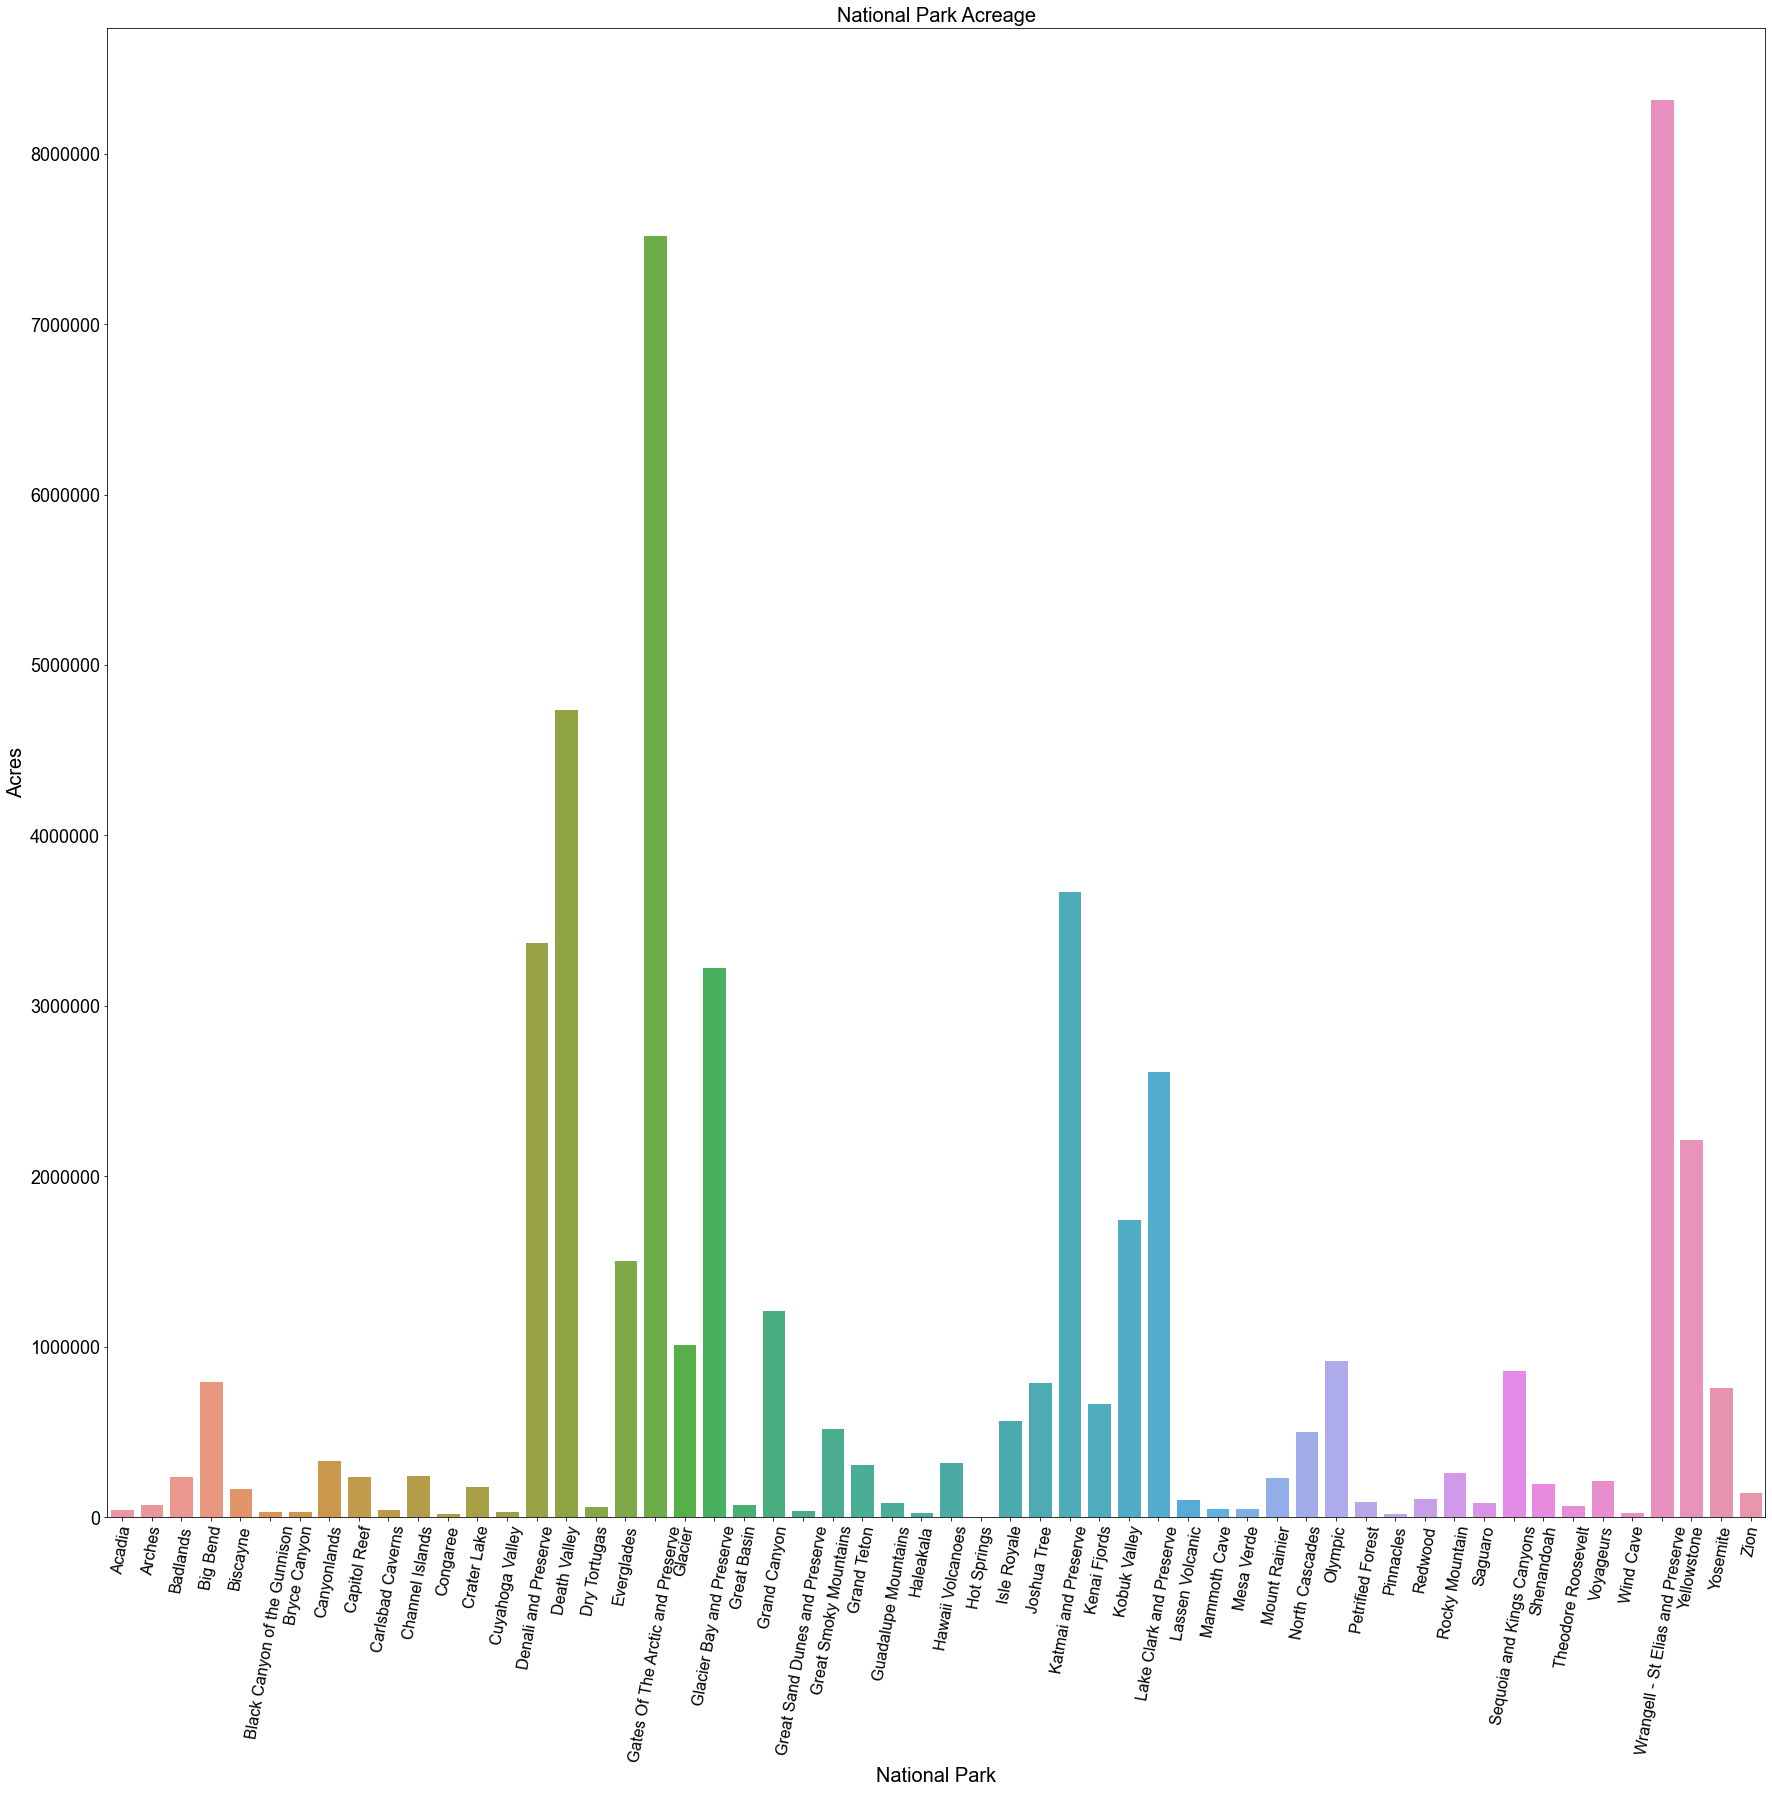

In [105]:
## Visualization 1.
## Barchart of the acreage area of each NP.

fig_dims = (25, 25)
fig, ax = plt.subplots(figsize=fig_dims)
x = NP_merged_final.park_name_y
y = NP_merged_final.acres
sns.set(font_scale = 2)
sns.barplot(x,y,ax=ax)
plt.xticks(rotation=80, fontsize = 16)
plt.yticks(fontsize = 18)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.tight_layout()
plt.title('National Park Acreage',fontsize=20)
plt.xlabel('National Park', fontsize=20)
plt.ylabel('Acres', fontsize=20)

#### Visualization 2: State Representation of All National Parks.

Text(0.5, 1.0, 'National Parks by State')

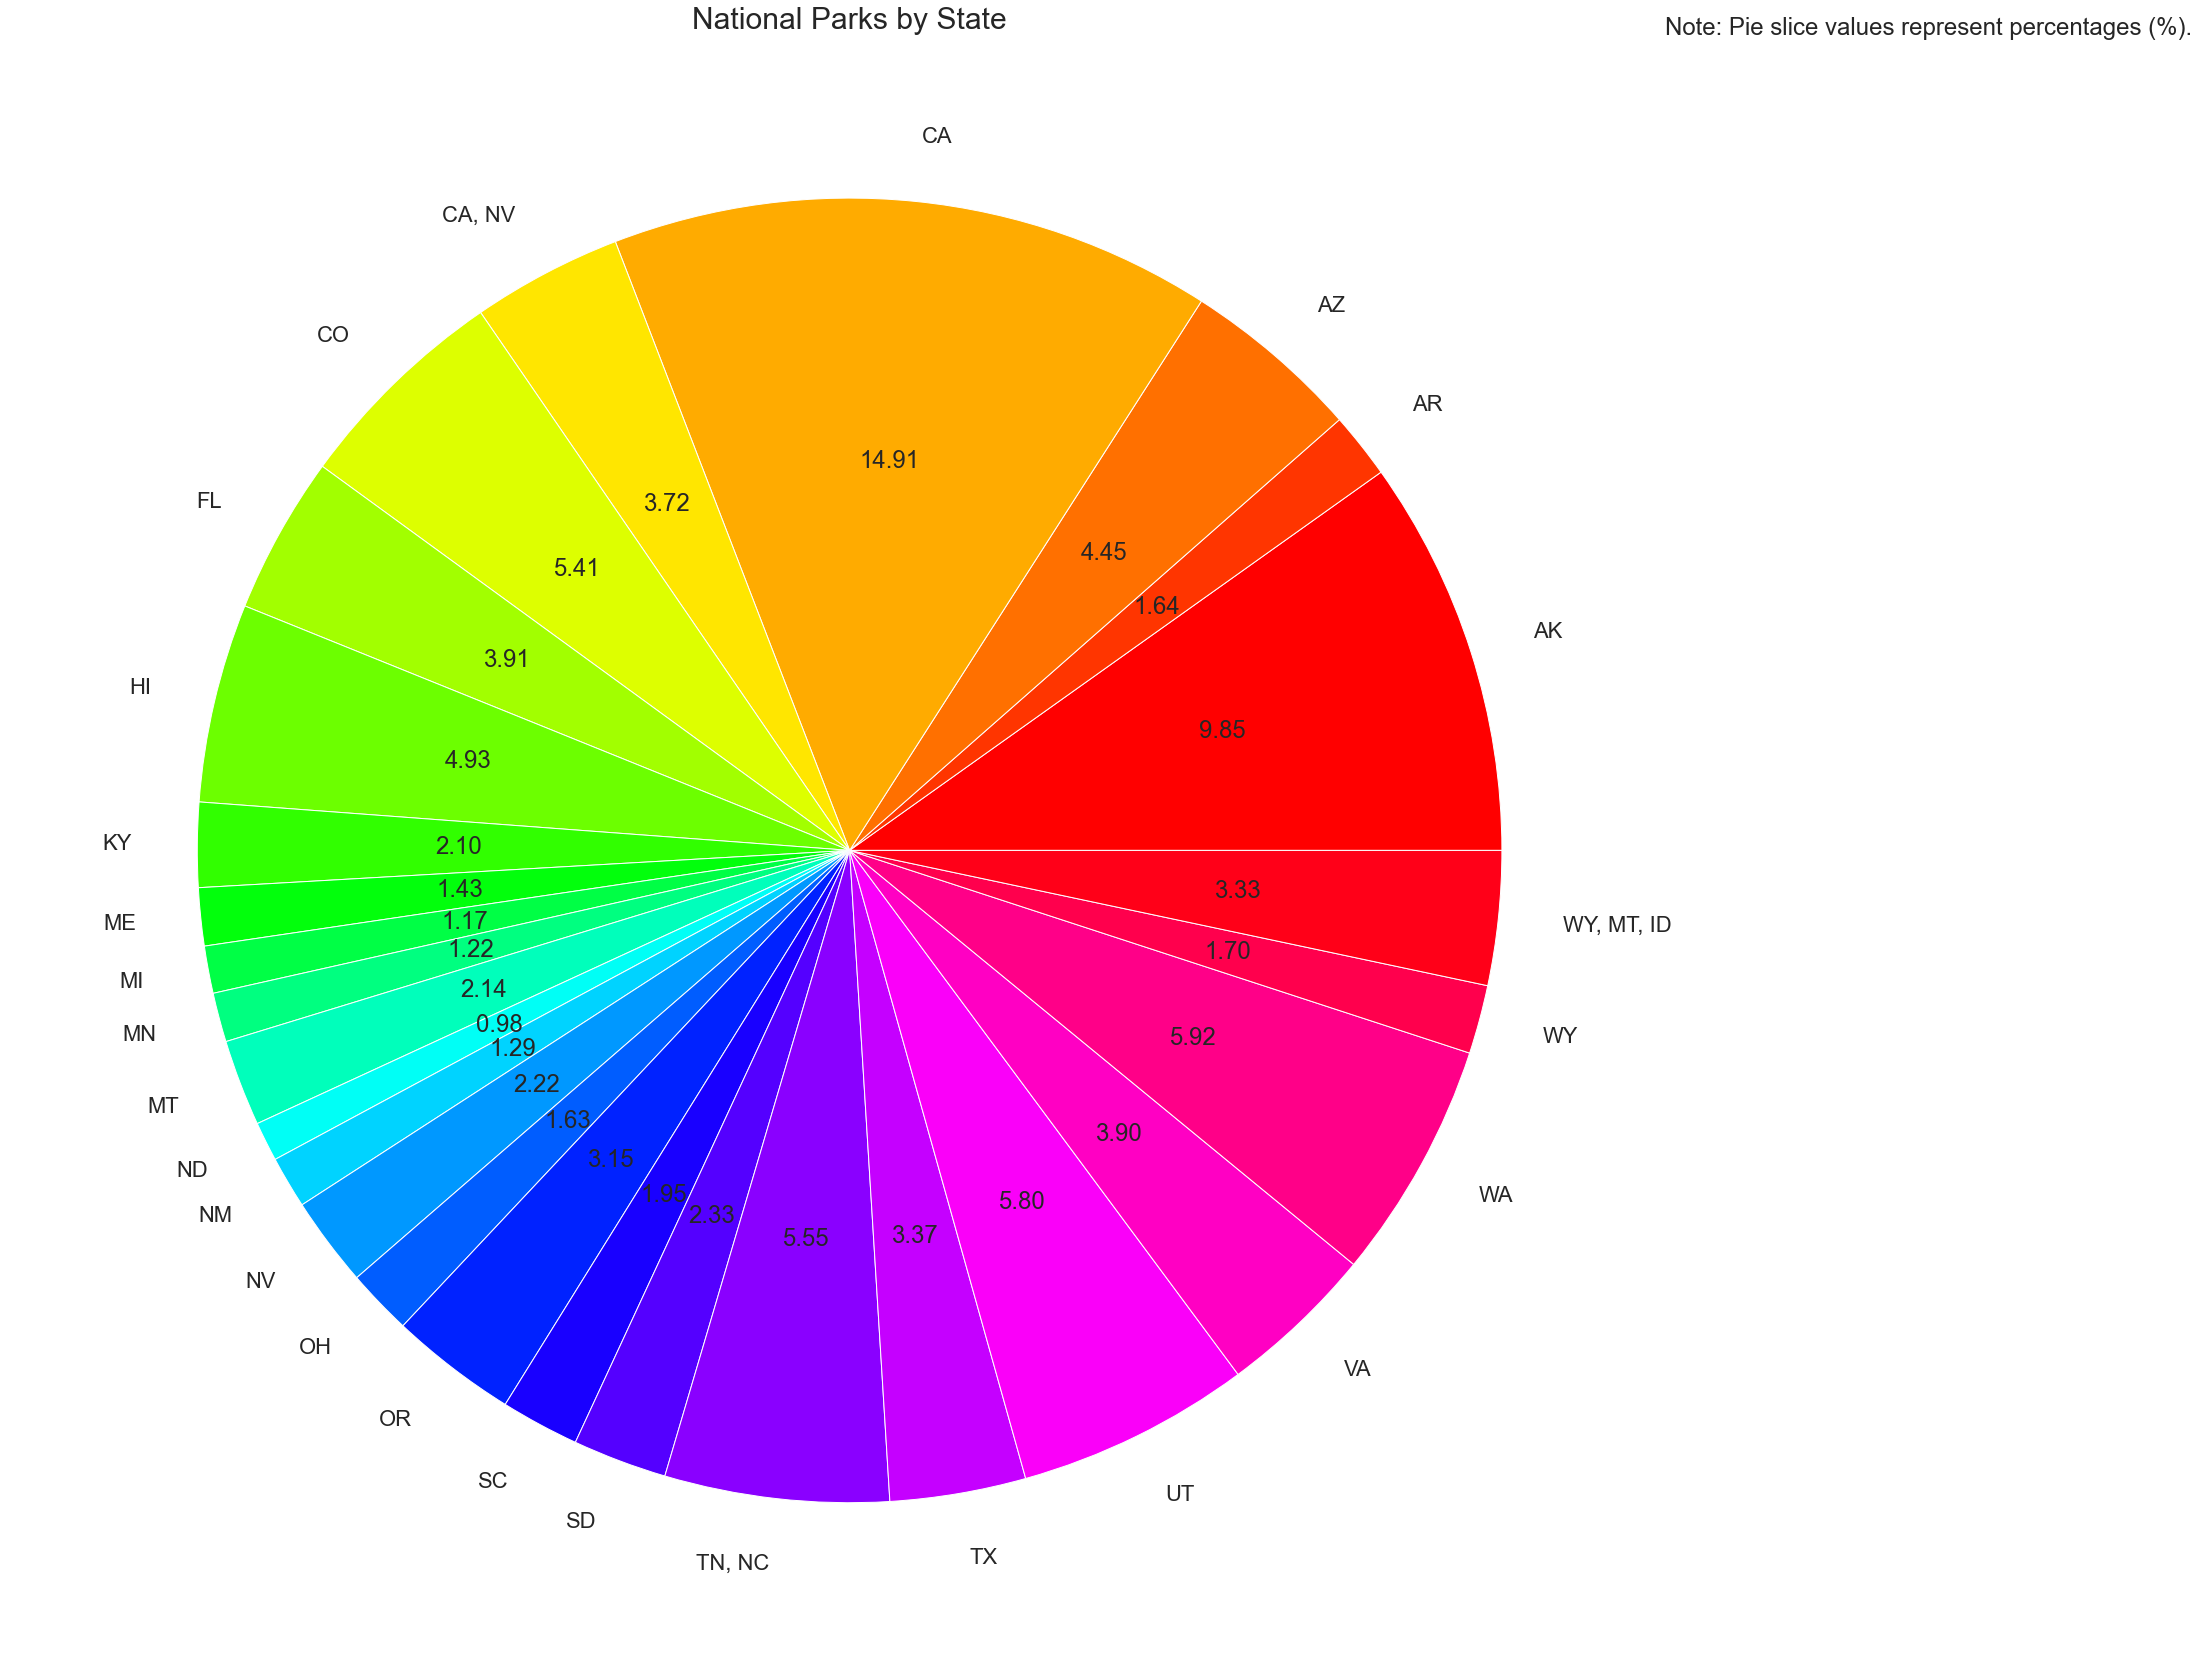

In [106]:
## Pie chart of state representation.

## fig_dims = (25, 25)
fig, ax = plt.subplots()
ax.annotate('Note: Pie slice values represent percentages (%).', xy = (1, 1), xycoords='axes fraction')
state_pie = NP_merged_final.groupby(NP_merged_final['state']).size().plot(kind='pie', cmap='hsv', autopct='%.2f', figsize=(30,30), title="National Parks by State", ylabel = "   ")
plt.title('National Parks by State',fontsize=30)

#### Visualization 3: Histogram of Elevation Ranges for all National Parks.

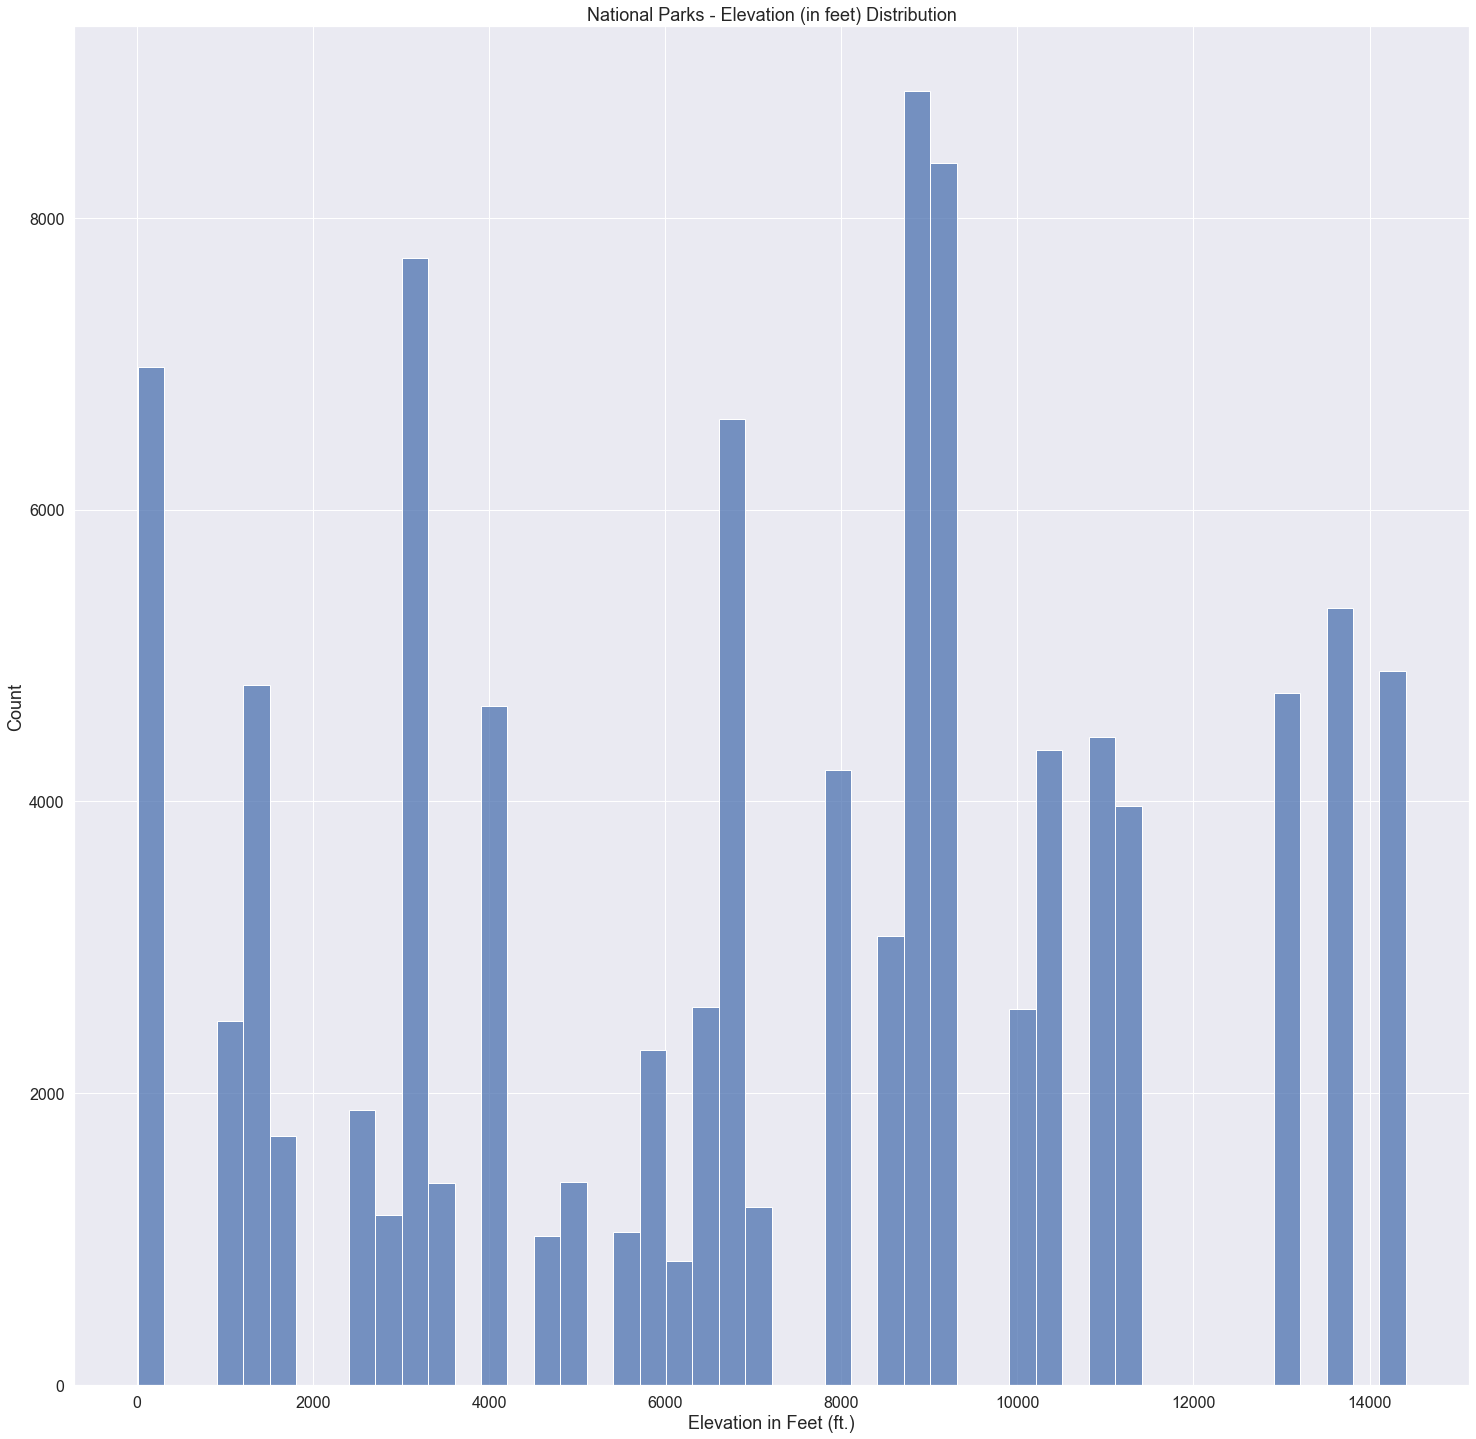

In [107]:
## Histogram of the distribution of elevation range.

fig_dims = (25, 25)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=NP_merged_final, x="elevation_feet")
sns.set(font_scale = 2)
plt.title('National Parks - Elevation (in feet) Distribution',fontsize=18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Elevation in Feet (ft.)', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.show()

#### Visualization 4: Horizontal Barchart - Annual Tourist Visitor Numbers by National Park.

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(-57.75, 0.5, 'National Park')

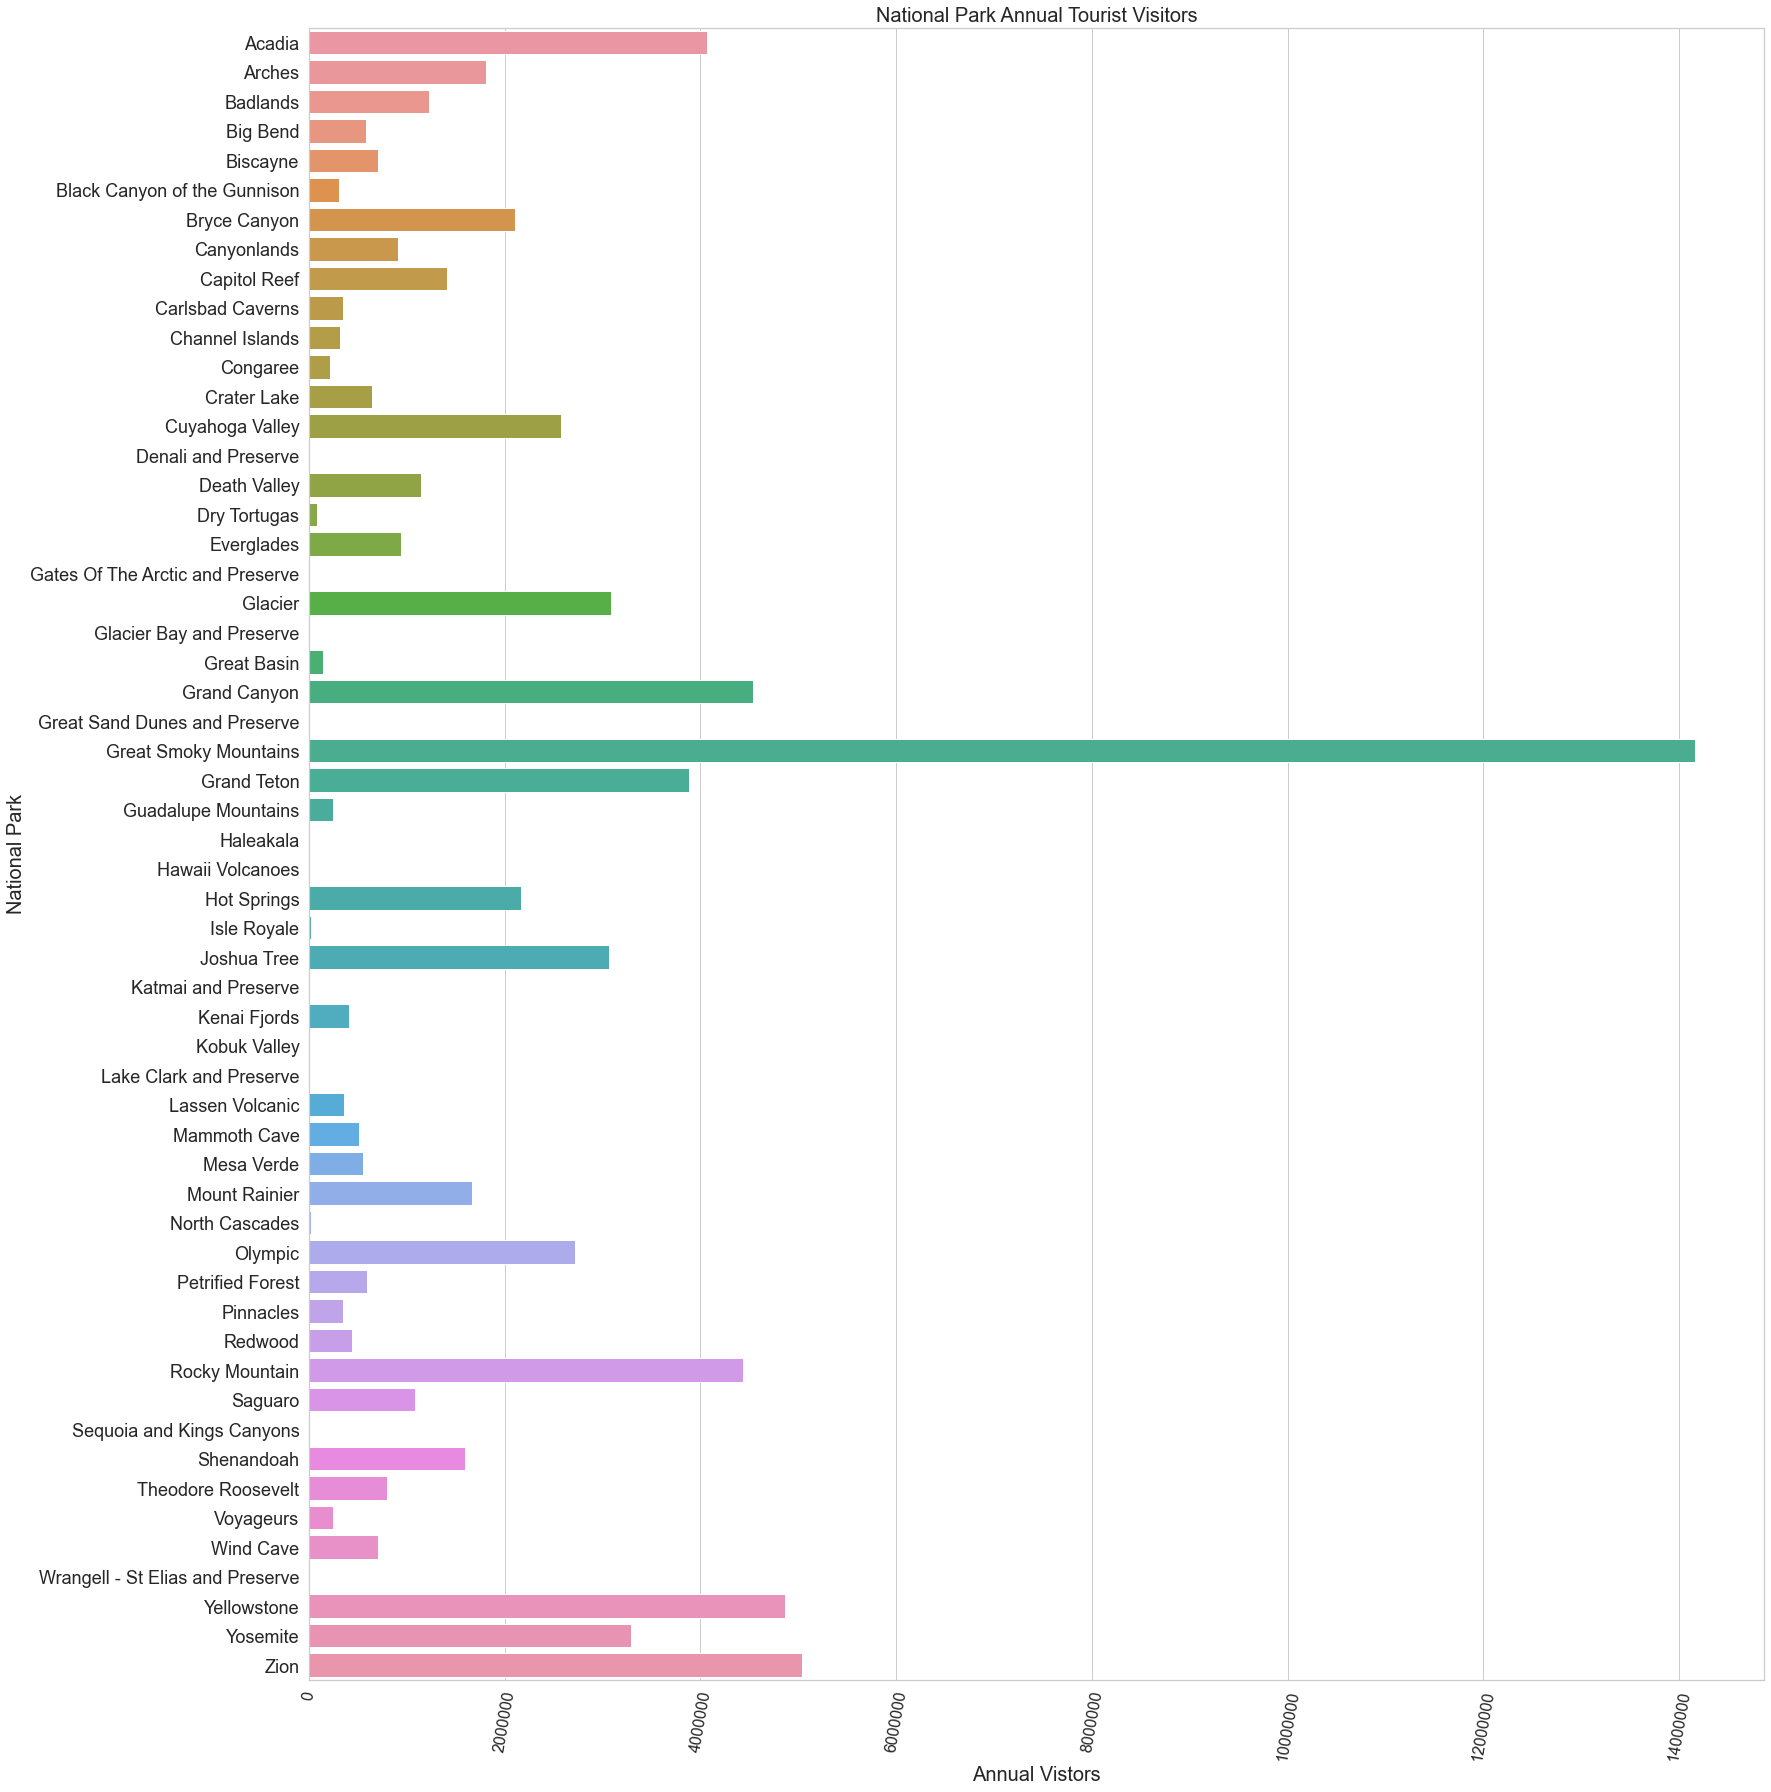

In [108]:
## Horizontal barchart for tourism numbers.

import plotly.express as px
from itertools import cycle
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
sns.set_theme(style="whitegrid")




# Load the example car crash dataset
## crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

fig_dims = (25, 25)
fig, ax = plt.subplots(figsize=fig_dims)
## sns.barplot(x="visitors_annual", y="park_name_y", data=NP_merged_final,)
x = NP_merged_final.visitors_annual
y = NP_merged_final.park_name_y
sns.set(font_scale = 2)
sns.barplot(x,y,ax=ax)
plt.xticks(rotation=80, fontsize = 16)
plt.yticks(fontsize = 18)
plt.ticklabel_format(useOffset=False, style='plain', axis='x')
plt.tight_layout()
plt.title('National Park Annual Tourist Visitors',fontsize=20)
plt.xlabel('Annual Vistors', fontsize=20)
plt.ylabel('National Park', fontsize=20)


#### Visualization 5: Donut Chart - Species Class Type Distributions for all National Parks.

<function matplotlib.pyplot.show(close=None, block=None)>

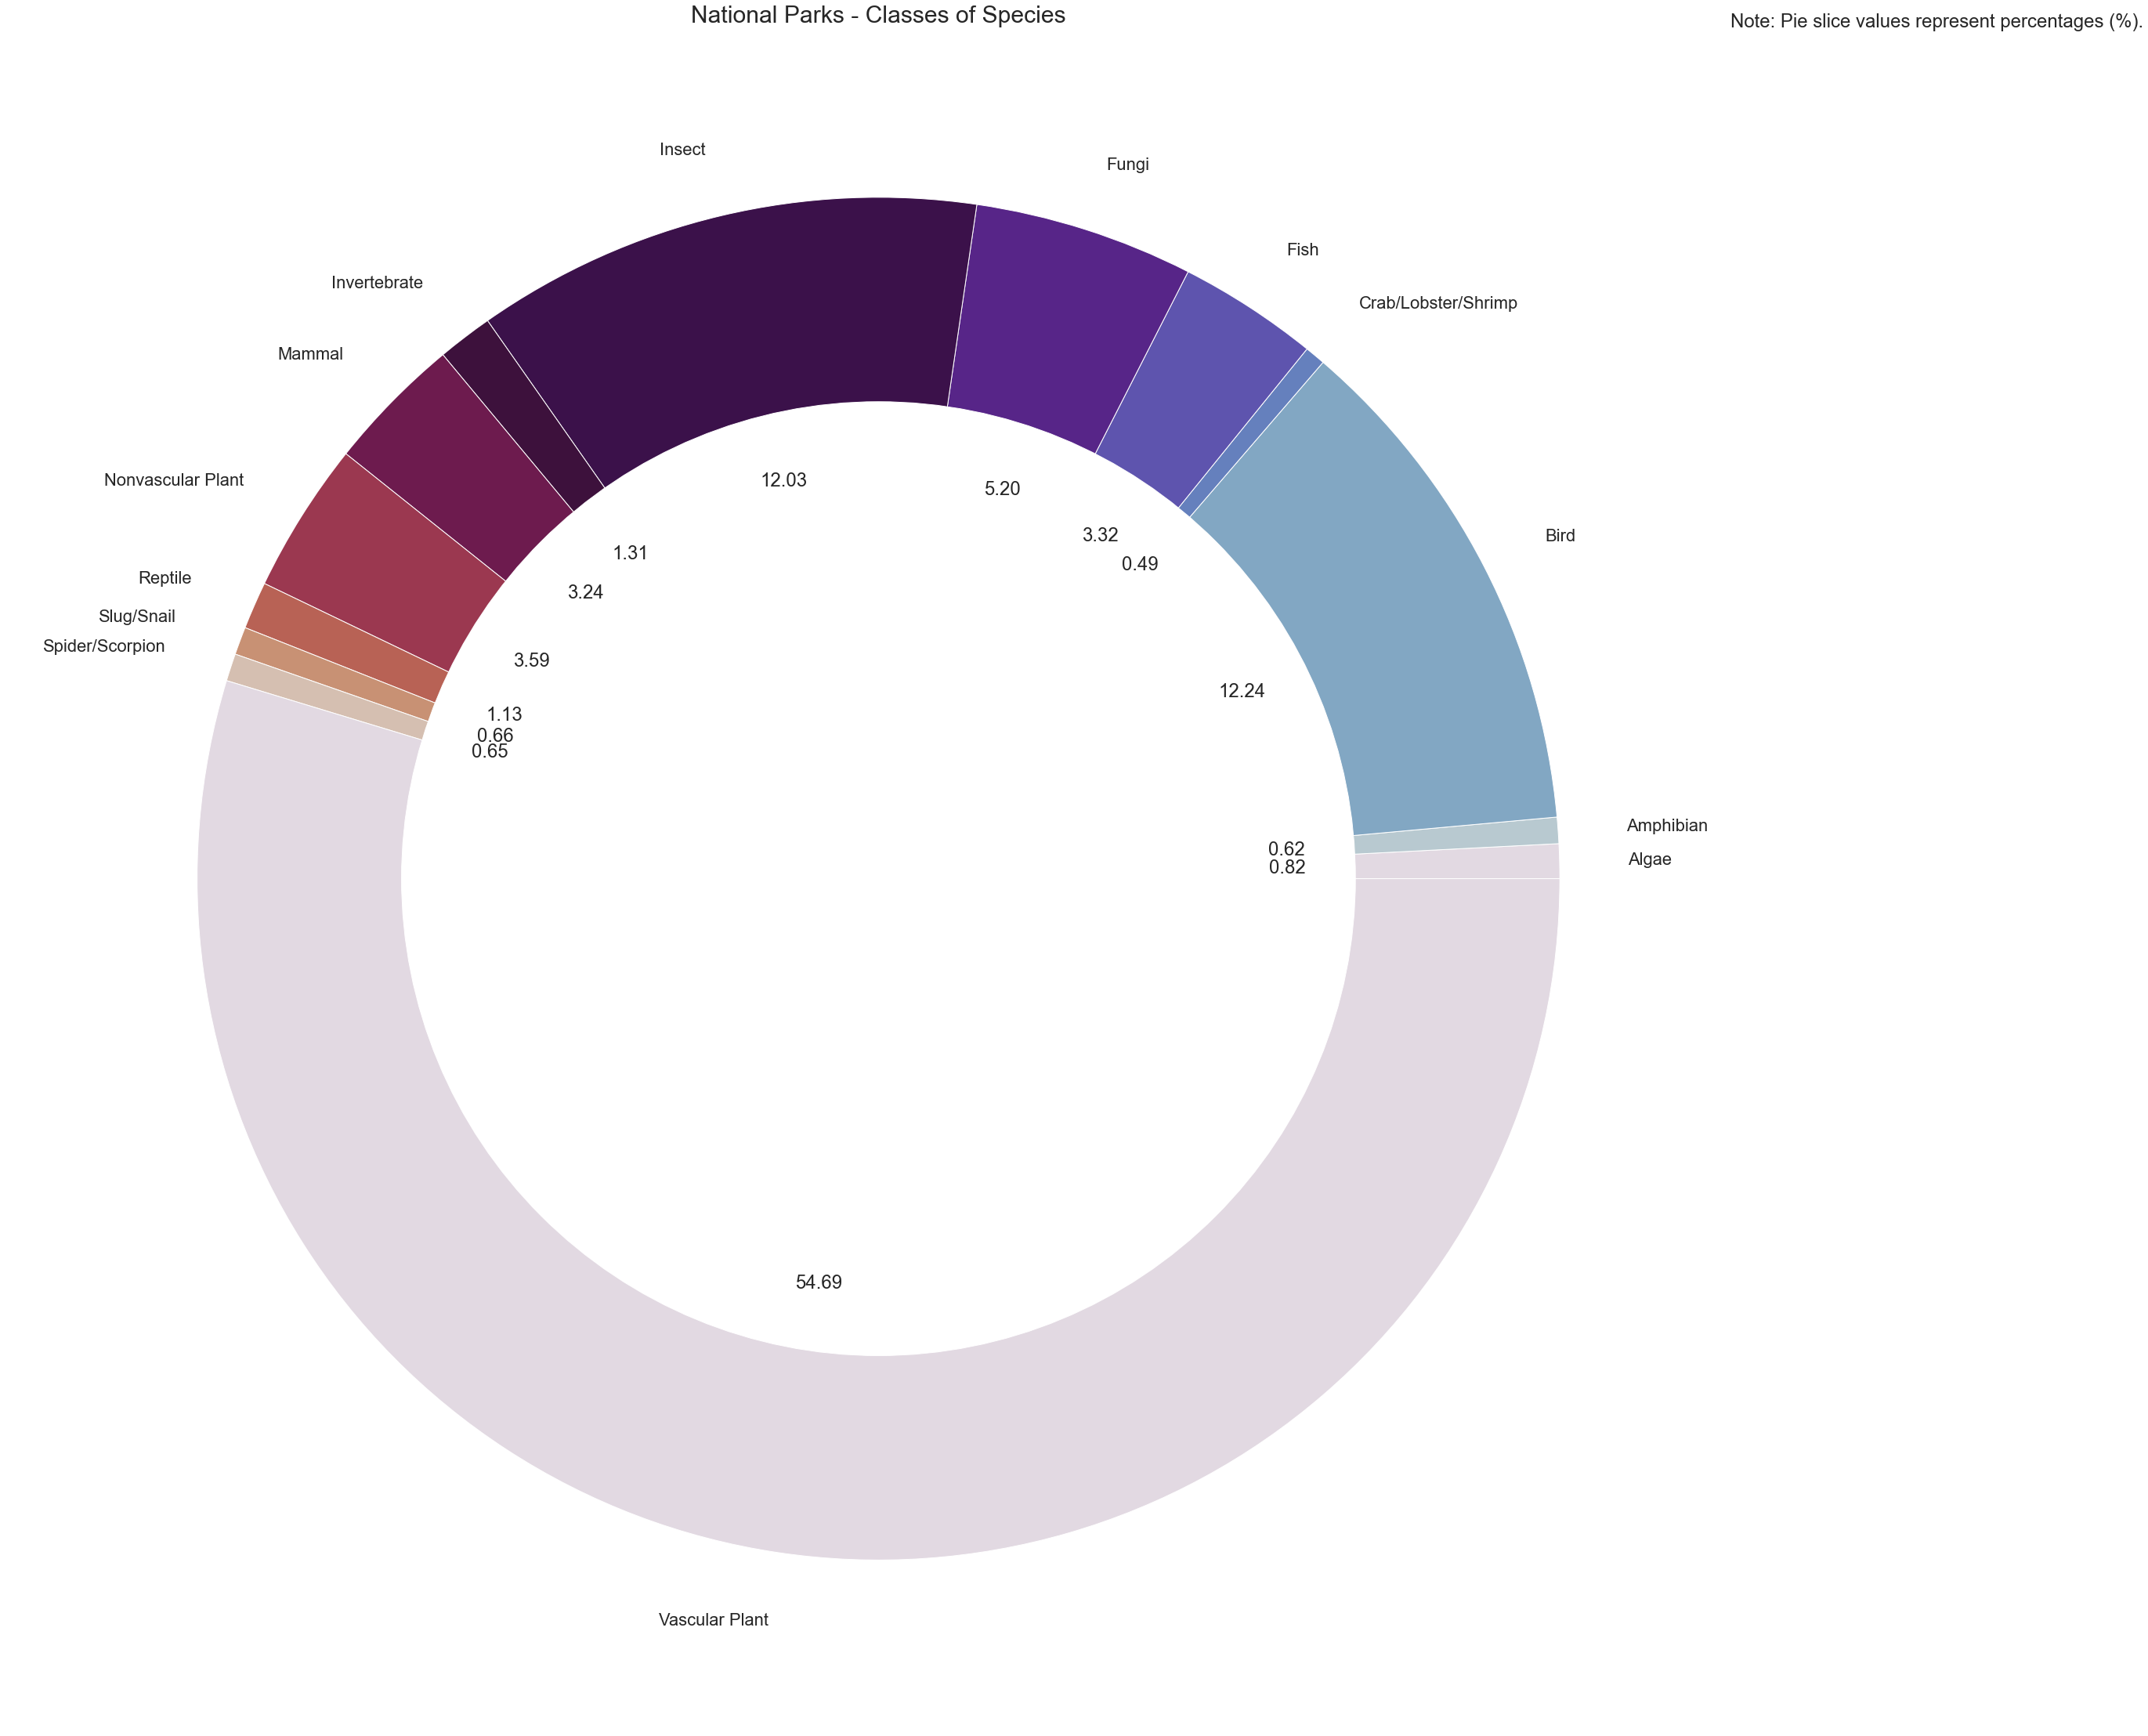

In [109]:
## Donut chart of species class distributions of all of the NPs (aggregate).

## fig_dims = (25, 25)
fig, ax = plt.subplots()
ax.annotate('Note: Pie slice values represent percentages (%).', xy = (1, 1), xycoords='axes fraction')
speciesclass_donut = NP_merged_final.groupby(NP_merged_final['category']).size().plot(kind='pie', cmap='twilight', autopct='%.2f', figsize=(40,40), title="National Parks by State", ylabel = "   ")
plt.title('National Parks - Classes of Species',fontsize=30)
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show

From these visualizations, we can ascertain:
-	From an acreage standpoint, quite a variety exists between all National Parks.
-	California has the most National Parks of any state.
-	The elevation of the National Parks did not follow a normal distribution curve.
-	The National Park with the largest number of visitors by far was the Great Smoky Mountains.
-	The majority of species class across all National Parks is vascular plants.
